# DAV 6150 Project 1

_Mudassir Imam, Juan Leonhardt, Yu Wang_

# Introduction

This project delves into the analysis of a comprehensive dataset sourced from the New York State Education Department (NYSED), focusing on high school graduation metrics for the 2018-2019 school year. With over 73,000 observations encompassing various school districts and student subgroupings, this dataset provides a valuable resource for understanding the dynamics of student dropout rates within New York State high schools.

The primary objective of this project is to employ the full data science project lifecycle to develop regression models predicting student dropout counts within specific school districts and associated student subgroupings. By applying exploratory data analysis (EDA), data preparation techniques including attribute transforms and feature engineering, feature selection methodologies, and thorough evaluation of model performance metrics, this project aims to uncover the underlying factors influencing student dropout rates.

Through this analysis, we seek to identify key predictors associated with student dropout, thereby providing insights that can inform educational policymakers, administrators, and stakeholders in their efforts to design targeted interventions aimed at reducing dropout rates and promoting student success in New York State high schools.By combining rigorous data science methodologies with domain expertise in the field of education research and policy development, this project aims to contribute to the ongoing discourse surrounding student dropout prevention and educational equity initiatives in New York State and beyond.

### Data loading

In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace the URL with the direct link to the raw csv file
url = "https://raw.githubusercontent.com/Juanfra21/Data-Science/main/Project1_Data.csv"

# Load data from the csv file into a pandas DataFrame
df = pd.read_csv(url)

# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Print the table
df

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73147,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73148,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73149,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-
73150,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,4,Rural High Needs,68,YATES,0,2013 Total Cohort - 6 Year Outcome - August 2019,...,-,-,-,-,-,-,-,-,-,-


# Exploratory Data Analysis

## General EDA

### Data types

In [2]:
# Display data types of each column
df.dtypes

report_school_year            object
aggregation_index              int64
aggregation_type              object
aggregation_name              object
nrc_code                       int64
nrc_desc                      object
county_code                    int64
county_name                   object
nyc_ind                        int64
membership_desc               object
subgroup_code                  int64
subgroup_name                 object
enroll_cnt                    object
grad_cnt                      object
grad_pct                      object
local_cnt                     object
local_pct                     object
reg_cnt                       object
reg_pct                       object
reg_adv_cnt                   object
reg_adv_pct                   object
non_diploma_credential_cnt    object
non_diploma_credential_pct    object
still_enr_cnt                 object
still_enr_pct                 object
ged_cnt                       object
ged_pct                       object
d

### Missing Data Values

Observing the data table, we find that there are many null values in the data table, in order to facilitate the subsequent study, let's first deal with the missing data.

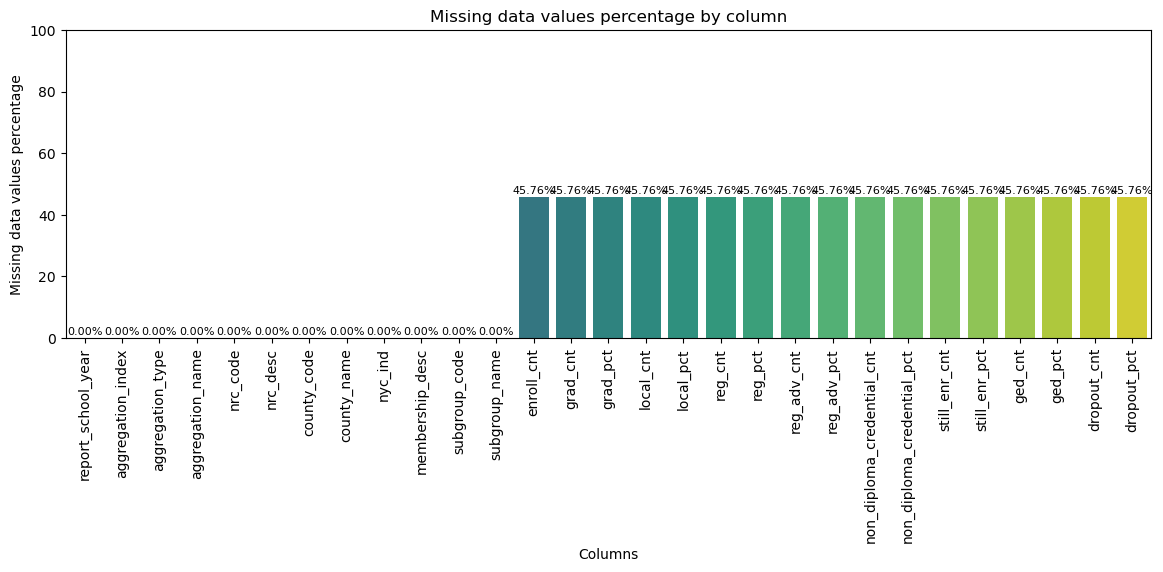

In [3]:
# Replace '-' with NaN
df.replace('-', np.nan, inplace=True)

# Let's show the percentage of missing data values per column
nan_count_by_column = df.isna().sum()
total_rows = len(df)

# Calculate the percentage of NaNs for each column
nan_percentage_by_column = (nan_count_by_column / total_rows) * 100

# Plotting with Seaborn
plt.figure(figsize=(14, 4))
sns.barplot(x=nan_percentage_by_column.index, y=nan_percentage_by_column.values, palette="viridis")

# Adding labels and title
plt.xlabel("Columns")
plt.ylabel("Missing data values percentage")
plt.title("Missing data values percentage by column")

# Display the percentage values on top of each bar
for i, value in enumerate(nan_percentage_by_column.values):
    plt.text(i, value + 0.5, f"{value:.2f}%", ha='center', va='bottom', fontsize=8)

# Set y-axis limits to range from 0 to 100
plt.ylim(0, 100)   
    
# Rotate x-axis labels
plt.xticks(rotation=90)

# Display the plot
plt.show()

This bar chart provides a visual representation of the percentage of missing data values for different data columns. Most of the data columns have 0% percentage of missing data values indicating that these data sets are complete. However, there are several data columns that show 45.76% missing data values and these columns are highlighted in different colors in the chart. These data columns include subgroup id_str, grade_id_str, loc_id_str, read_id_str, math_id_str, non-diploma_credential_id_str, all_student_id_str, silv_cert_ id_str, and gold_cert_id_str.

### Duplicated data

In [4]:
# Check the total number of duplicated rows
df.duplicated().sum()

0

As observed, there are no duplicate entries in this dataset.

## Univariate EDA

### Non-predictive variables

In [5]:
df['report_school_year'].nunique()

1

In [6]:
df['aggregation_index'].nunique()

1

In [7]:
df['aggregation_type'].nunique()

1

As observed, the report_school_year is 2018-19, the aggregation_index is 3 and the aggregation_type is District.

### NRC Code

In [8]:
pd.DataFrame({'nrc_code': df['nrc_code'].unique(), 'nrc_desc': df['nrc_desc'].unique(), 'count': df['nrc_code'].value_counts()})

,nrc_code,nrc_desc,count
5,3,Urban-Suburban High Needs,35322
4,5,Average Needs,14968
6,6,Low Needs,13068
3,4,Rural High Needs,5228
1,2,Buffalo Rochester Yonkers Syracuse,4042
2,1,NYC,524


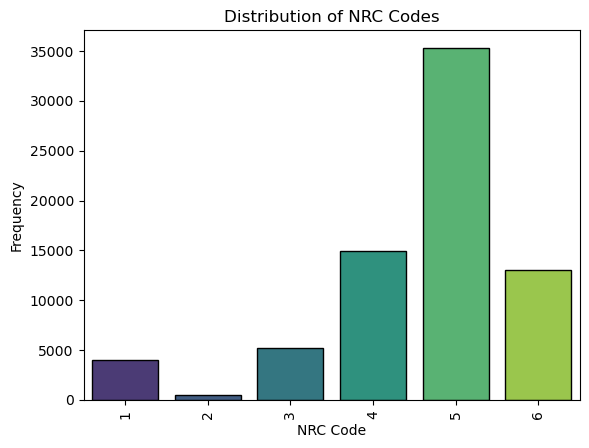

In [9]:
# Create a bar plot using Seaborn
sns.countplot(x="nrc_code", data=df, edgecolor="black", palette='viridis')

# Add labels and title
plt.title("Distribution of NRC Codes")
plt.xlabel("NRC Code")
plt.ylabel("Frequency");

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)  

# Display the plot
plt.show()

The data contains counts for various categories represented by NRC_Code. Average Needs districts has the highest count (35,322), followed by Rural High Needs (14,968) and Low Needs (13,068). Urban-Suburban High Needs has 5,228 counts, NYC has 4,042, and Buffalo Rochester Yonkers Syracuse has the lowest count (524). 

### County Code

In [10]:
pd.DataFrame({'county_code': df['county_code'].unique(), 'county_name': df['county_name'].unique(), 'count': df['county_code'].value_counts()})

,county_code,county_name,count
58,1,ALBANY,6526
28,2,ALLEGANY,5190
66,3,BROOME,4834
14,4,CATTARAUGUS,3202
26,5,CAYUGA,2196
...,...,...,...
7,64,WASHINGTON,340
20,65,WAYNE,226
68,66,WESTCHESTER,212
55,67,WYOMING,202


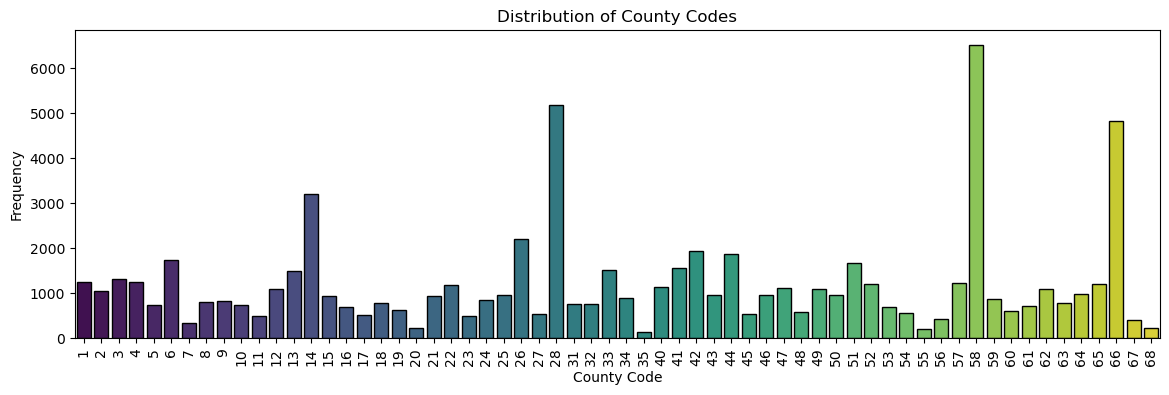

In [11]:
# Create a bar plot using Seaborn
plt.figure(figsize=(14, 4))
sns.countplot(x="county_code", data=df, edgecolor="black", palette='viridis')


# Add labels and title
plt.title("Distribution of County Codes")
plt.xlabel("County Code")
plt.ylabel("Frequency");

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)  

# Display the plot
plt.show()

The data provided represents counts associated with different County_Code values. Each County_Code corresponds to a specific county, while the Count column indicates the number of occurrences or counts associated with each county. For instance, County_Code 58 has the highest count with 6,526 occurrences, followed by County_Code 28 with 5,190 occurrences and County_Code 66 with 4,834 occurrences. On the other hand, County_Code 35 has the lowest count with 130 occurrences. 

### NYC Indicator

In [12]:
# Count occurrences of each NYC Indicator code
nyc_ind_counts = df['nyc_ind'].value_counts()

# Create a DataFrame from the result
nyc_ind_counts_df = pd.DataFrame({'NYC_Ind': nyc_ind_counts.index, 'Count': nyc_ind_counts.values})

# Display the DataFrame
nyc_ind_counts_df

,NYC_Ind,Count
0,0,69110
1,1,4042


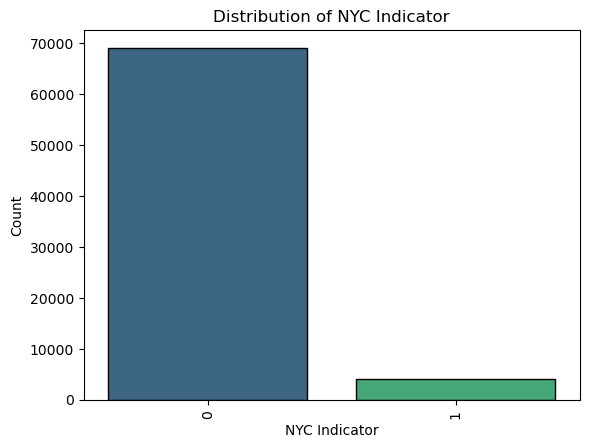

In [13]:
# Create a bar plot using Seaborn
sns.countplot(x="nyc_ind", data=df, edgecolor="black", palette='viridis')

# Add labels and title
plt.title("Distribution of NYC Indicator")
plt.xlabel("NYC Indicator")
plt.ylabel("Count");

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)  

# Display the plot
plt.show()

The data provided represents the number of records of two different types, records with NYC_Ind 0 and 1. The number of records with NYC_Ind 0 is 69,110 and the number of records with NYC_Ind 1 is 4,042.The number of records with a NYC_Ind of 0 is much higher than the number of records with a NYC_Ind of 1.

### First Enrolled  School Year 

In [14]:
# Count occurrences of each NYC Indicator code
membership_desc_counts = df['membership_desc'].value_counts()

# Create a DataFrame from the result
membership_desc_counts_df = pd.DataFrame({'Membership Desc': membership_desc_counts.index, 'Count': membership_desc_counts.values})

# Display the DataFrame
print(membership_desc_counts_df)

                                    Membership Desc  Count
0                2015 Total Cohort - 4 Year Outcome  12299
1  2015 Total Cohort - 4 Year Outcome - August 2019  12299
2                2014 Total Cohort - 5 Year Outcome  12257
3  2014 Total Cohort - 5 Year Outcome - August 2019  12257
4                2013 Total Cohort - 6 Year Outcome  12020
5  2013 Total Cohort - 6 Year Outcome - August 2019  12020


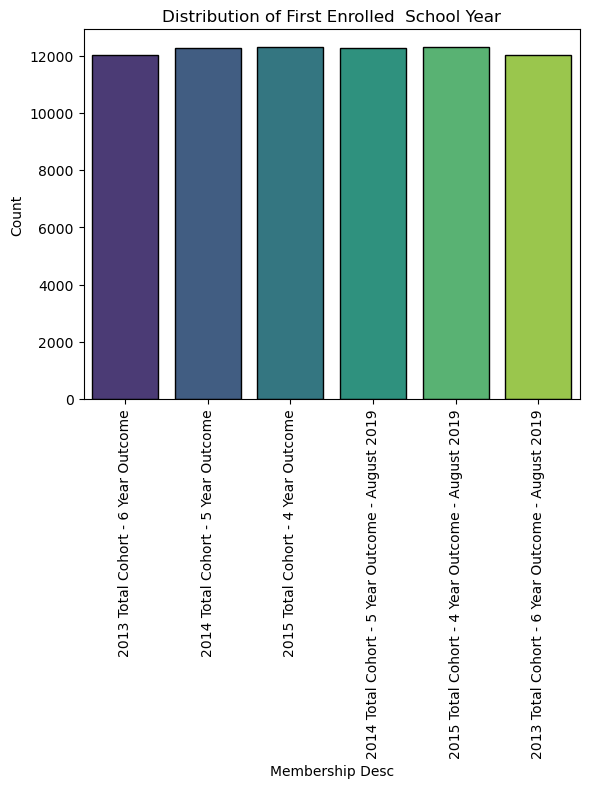

In [15]:
# Create a bar plot using Seaborn
sns.countplot(x="membership_desc", data=df, edgecolor="black", palette='viridis')

# Add labels and title
plt.title("Distribution of First Enrolled  School Year")
plt.xlabel("Membership Desc")
plt.ylabel("Count");

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)  

# Display the plot
plt.show()

We can see the number of total queue members from different years, including students from 2015, 2014 and 2013. The data contains different exits from the total cohort by year, covering 4, 5 and 6 years of results, as well as the August 2019 status. The histograms illustrate the distribution of these data, with each bar representing the number of members of the total cohort in a given year, and the height of the bar reflecting the number of members of the total cohort in that year. As can be seen from the histogram, the number of total queue members is roughly similar across years, ranging from 12,000 to 12,300.

### Subgroup Code

In [16]:
pd.DataFrame({'subgroup_code': df['subgroup_code'].unique(), 'subgroup_name': df['subgroup_name'].unique(), 'count': df['subgroup_code'].value_counts()})

,subgroup_code,subgroup_name,count
1,1,All Students,4074
25,2,Female,4074
21,3,Male,4074
18,4,American Indian/Alaska Native,4074
23,5,Black,4070
12,6,Hispanic,4068
3,7,Asian/Pacific Islander,4068
2,8,White,4060
10,9,Multiracial,4056
8,10,General Education Students,4050


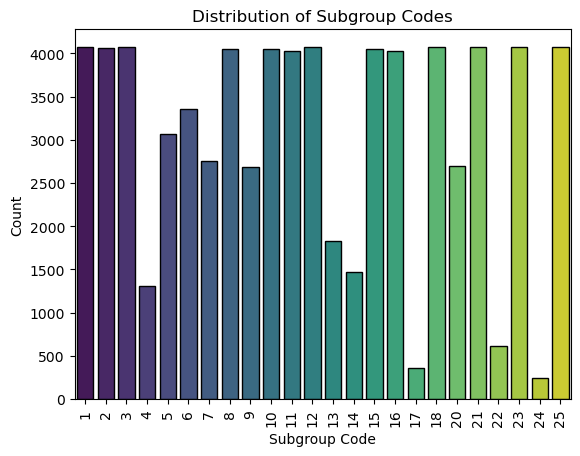

In [17]:
# Create a bar plot using Seaborn
sns.countplot(x="subgroup_code", data=df, edgecolor="black", palette='viridis')

# Add labels and title
plt.title("Distribution of Subgroup Codes")
plt.xlabel("Subgroup Code")
plt.ylabel("Count");

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)  

# Display the plot
plt.show()

As can be seen from the histogram, most of the subgroup codes possess a number close to or equal to 4074, while a few subgroup codes have a number significantly lower than this value. Overall, the histogram presents a nearly uniform distribution, except for a few subgroup codes whose numbers are significantly lower.

In [18]:
df_no_subgroup = df.drop(columns = ['subgroup_code', 'subgroup_name'])
df_no_subgroup.duplicated().sum()

29422

This suggests that students can belong to more than one subgroup, and we need to address this accordingly in the data preparation.

### Enroll Count

In [19]:
# Convert 'enroll_cnt' to numeric
df['enroll_cnt'] = pd.to_numeric(df['enroll_cnt'], errors='coerce')

# Count NaN values by column
nan_count_by_column = df.isna().sum()

# Total rows
total_rows = len(df)
# Describe the column
df["enroll_cnt"].describe()

count    39674.000000
mean       192.120079
std        439.972474
min          5.000000
25%         25.000000
50%         66.000000
75%        179.000000
max       9176.000000
Name: enroll_cnt, dtype: float64

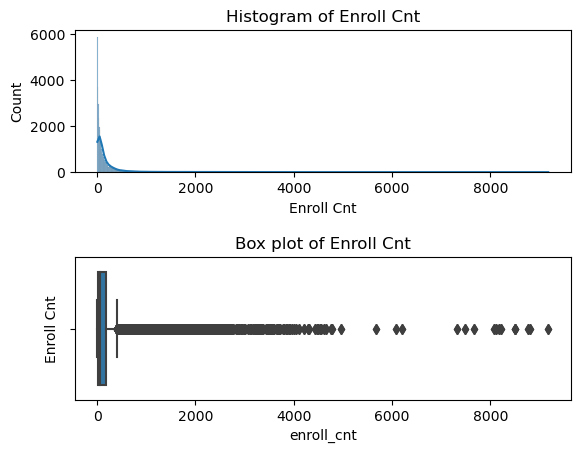

In [20]:
# Define the figure
fig_1 = plt.figure(1)

# Adjust the distance between the plots
plt.subplots_adjust(hspace=0.6)

### First plot - Histogram ###
plt.subplot(211) # Position
plt.title("Histogram of Enroll Cnt") # Title
sns.histplot(data=df, x="enroll_cnt", kde=True)
plt.xlabel("Enroll Cnt")

### Second plot - Box plot ###
plt.subplot(212) # Position
plt.title("Box plot of Enroll Cnt") # Title
sns.boxplot(data=df, x="enroll_cnt")  # Use 'y' for vertical orientation
plt.ylabel("Enroll Cnt")

# Show the plots
plt.show()

The data in the enroll_cnt column shows a somewhat right-skewed distribution. Specifically, the mean of the data is 192.12, indicating that most observations are concentrated in the lower range, while the maximum value is 9176, which is much higher than the mean. The standard deviation is approximately 439.97, indicating a large degree of dispersion and a large degree of data volatility. Most of the observations are concentrated in the lower range of values while a few are higher.

### Graduated

In [21]:
# Convert grad_pct column to string
df['grad_pct'] = df['grad_pct'].astype(str)

# Remove percentage sign and convert to numeric
df['grad_pct'] = df['grad_pct'].str.rstrip('%').astype(float)
df['grad_cnt'] = df['grad_cnt'].astype(float)

# Count NaN values by column
nan_count_by_column = df.isna().sum()

# Total rows
total_rows = len(df)

# Describe the selected columns
df[['grad_cnt','grad_pct']].describe()

,grad_cnt,grad_pct
count,39674.000000,39674.000000
mean,161.178354,84.406614
std,361.294773,15.679500
min,0.000000,0.000000
25%,20.000000,79.000000
50%,57.000000,89.000000
75%,156.000000,95.000000
max,7540.000000,100.000000


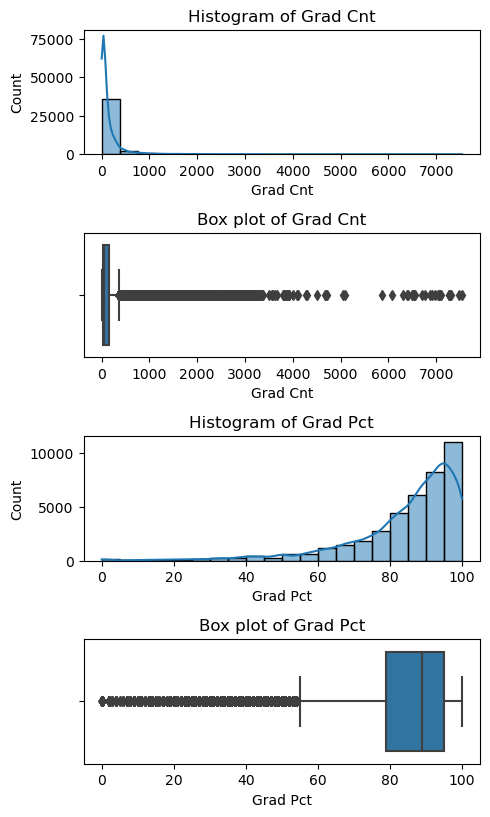

In [22]:
# Define the figure
plt.figure(figsize=(5, 18))

# Adjust the distance between the plots
plt.subplots_adjust(hspace=0.6)

### Histogram 1 ###
plt.subplot(911) # Position
plt.title("Histogram of Grad Cnt") # Title
sns.histplot(data=df, x='grad_cnt', bins=20, kde=True)
plt.xlabel("Grad Cnt")

### Box plot 1 ###
plt.subplot(912) # Position
plt.title("Box plot of Grad Cnt") # Title
sns.boxplot(data=df, x="grad_cnt")
plt.xlabel("Grad Cnt")

### Histogram 2 ###
plt.subplot(913) # Position
plt.title("Histogram of Grad Pct") # Title
sns.histplot(data=df, x="grad_pct", bins=20, kde=True)
plt.xlabel("Grad Pct")

### Box plot 2 ###
plt.subplot(914) # Position
plt.title("Box plot of Grad Pct") # Title
sns.boxplot(data=df, x="grad_pct")
plt.xlabel("Grad Pct")

# Show the plots
plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()

The Grad Cnt histogram shows the distribution of the number of graduates (Grad Cnt) in the data set, with most of the data points clustered in the lower graduation range, from 0 to 7000, showing a right-skewed distribution, and the distribution of the number of graduates is further illustrated by the Grad Cnt boxplot, which shows the median, interquartile range, and outliers of the data.Grad Pct histogram shows the distribution of graduation rates (Grad Pct) in the dataset with a bimodal distribution, with one peak around 20 and the other around 80, while the Grad Pct box-and-line plot illustrates the distribution of graduation rate data, showing the median, interquartile range, and outliers of the data. Based on the descriptive statistics, the Grad Cnt has a mean of about 161 and a median of 57, indicating that the majority of students are graduating in low numbers, while the Grad Pct has a mean of about 84% and a median of 89%, showing a trend of concentration in graduation rates.

### Local

In [23]:
# Convert grad_pct column to string
df['local_pct'] = df['local_pct'].astype(str)

# Remove percentage sign and convert to numeric
df['local_pct'] = df['local_pct'].str.rstrip('%').astype(float)
df['local_cnt'] = df['local_cnt'].astype(float)

# Count NaN values by column
nan_count_by_column = df.isna().sum()

# Total rows
total_rows = len(df)

# Describe the selected columns
df[['local_cnt','local_pct']].describe()

,local_cnt,local_pct
count,39674.000000,39674.000000
mean,12.340903,8.479936
std,32.046302,10.398486
min,0.000000,0.000000
25%,1.000000,2.000000
50%,4.000000,6.000000
75%,10.000000,11.000000
max,557.000000,100.000000


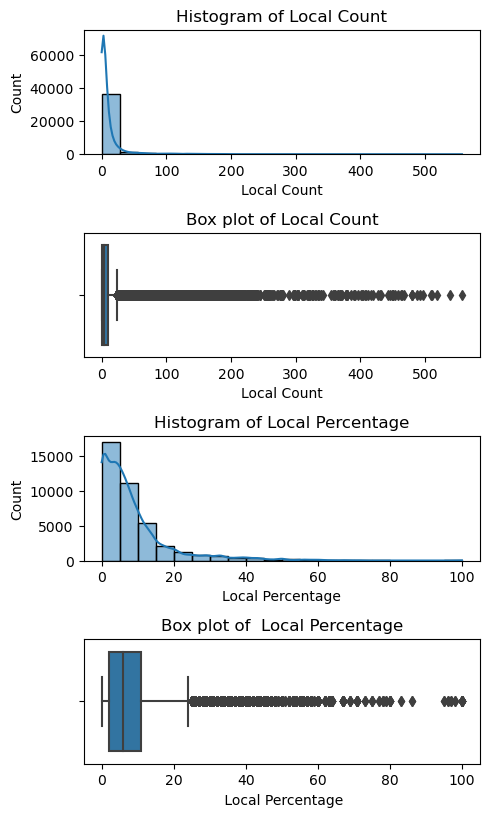

In [24]:
# Define the figure
plt.figure(figsize=(5, 18))

# Adjust the distance between the plots
plt.subplots_adjust(hspace=0.6)

### Histogram 1 ###
plt.subplot(911) # Position
plt.title("Histogram of Local Count") # Title
sns.histplot(data=df, x='local_cnt', bins=20, kde=True)
plt.xlabel("Local Count")

### Box plot 1 ###
plt.subplot(912) # Position
plt.title("Box plot of Local Count") # Title
sns.boxplot(data=df, x="local_cnt")
plt.xlabel("Local Count")

### Histogram 2 ###
plt.subplot(913) # Position
plt.title("Histogram of Local Percentage") # Title
sns.histplot(data=df, x="local_pct", bins=20, kde=True)
plt.xlabel( "Local Percentage")

### Box plot 2 ###
plt.subplot(914) # Position
plt.title("Box plot of  Local Percentage") # Title
sns.boxplot(data=df, x="local_pct")
plt.xlabel(" Local Percentage")

# Show the plots
plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()

The Local Count histogram presents the distribution of Local Counts, ranging from 0 to 60,000 on the y-axis and 0 to 500 on the x-axis, with the majority of the data points clustered in the lower Local Count range. The Local Count boxplot presents the distribution of the same data, while showing some outliers to highlight how discrete the data is. The Local Percentage histogram shows the distribution of Local Percentage, with counts up to about 15,000 and an x-axis range of 0 to 100, showing a somewhat skewed distribution. The Local Percentage Boxplot also shows the distribution of the Local Percentage data and displays a number of outliers, reflecting the range and degree of dispersion of the data.

### Regents

In [25]:
# Convert grad_pct column to string
df['reg_pct'] = df['reg_pct'].astype(str)

# Remove percentage sign and convert to numeric
df['reg_pct'] = df['reg_pct'].str.rstrip('%').astype(float)
df['reg_cnt'] = df['reg_cnt'].astype(float)

# Count NaN values by column
nan_count_by_column = df.isna().sum()

# Total rows
total_rows = len(df)

# Describe the selected columns
df[['reg_cnt','reg_pct']].describe()

,reg_cnt,reg_pct
count,39674.000000,39674.000000
mean,86.804708,43.371125
std,225.795826,17.124891
min,0.000000,0.000000
25%,10.000000,33.000000
50%,27.000000,43.000000
75%,69.000000,53.000000
max,4752.000000,100.000000


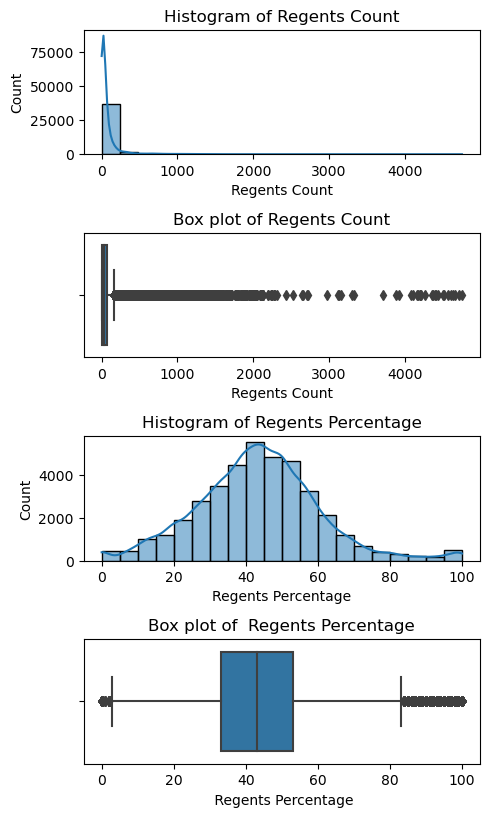

In [26]:
# Define the figure
plt.figure(figsize=(5, 18))

# Adjust the distance between the plots
plt.subplots_adjust(hspace=0.6)

### Histogram 1 ###
plt.subplot(911) # Position
plt.title("Histogram of Regents Count") # Title
sns.histplot(data=df, x='reg_cnt', bins=20, kde=True)
plt.xlabel("Regents Count")

### Box plot 1 ###
plt.subplot(912) # Position
plt.title("Box plot of Regents Count") # Title
sns.boxplot(data=df, x="reg_cnt")
plt.xlabel("Regents Count")

### Histogram 2 ###
plt.subplot(913) # Position
plt.title("Histogram of Regents Percentage") # Title
sns.histplot(data=df, x="reg_pct", bins=20, kde=True)
plt.xlabel( "Regents Percentage")

### Box plot 2 ###
plt.subplot(914) # Position
plt.title("Box plot of  Regents Percentage") # Title
sns.boxplot(data=df, x="reg_pct")
plt.xlabel(" Regents Percentage")

# Show the plots
plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()

The Regents Count histogram shows the distribution of Regents Count, where the data points are mainly concentrated between 0 and 1000, showing a right-skewed distribution.The Regents Count box-and-line plot shows the distribution of the same data, with outliers highlighted. In the Histogram of Regents Percentage, the data shows a bell-shaped distribution, with data points concentrated between 40% and 60%, showing some symmetry.The Boxplot of Regents Percentage shows the distribution of the Regents Percentage data and highlights the outliers, reflecting the range of distribution and the degree of dispersion of the data. 

### Regents Advanced

In [27]:
# Convert grad_pct column to string
df['reg_adv_pct'] = df['reg_adv_pct'].astype(str)

# Remove percentage sign and convert to numeric
df['reg_adv_pct'] = df['reg_adv_pct'].str.rstrip('%').astype(float)
df['reg_adv_cnt'] = df['reg_adv_cnt'].astype(float)

# Count NaN values by column
nan_count_by_column = df.isna().sum()

# Total rows
total_rows = len(df)

# Describe the selected columns
df[['reg_adv_cnt','reg_adv_pct']].describe()

,reg_adv_cnt,reg_adv_pct
count,39674.000000,39674.000000
mean,62.032742,32.577204
std,132.777866,23.001197
min,0.000000,0.000000
25%,4.000000,14.000000
50%,18.000000,31.000000
75%,62.000000,49.000000
max,2231.000000,100.000000


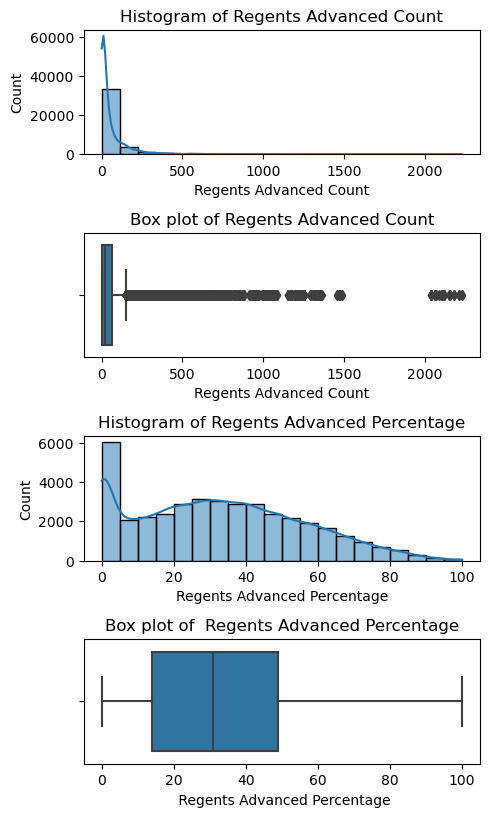

In [28]:
# Define the figure
plt.figure(figsize=(5, 18))

# Adjust the distance between the plots
plt.subplots_adjust(hspace=0.6)

### Histogram 1 ###
plt.subplot(911) # Position
plt.title("Histogram of Regents Advanced Count") # Title
sns.histplot(data=df, x='reg_adv_cnt', bins=20, kde=True)
plt.xlabel("Regents Advanced Count")

### Box plot 1 ###
plt.subplot(912) # Position
plt.title("Box plot of Regents Advanced Count") # Title
sns.boxplot(data=df, x="reg_adv_cnt")
plt.xlabel("Regents Advanced Count")

### Histogram 2 ###
plt.subplot(913) # Position
plt.title("Histogram of Regents Advanced Percentage") # Title
sns.histplot(data=df, x="reg_adv_pct", bins=20, kde=True)
plt.xlabel( "Regents Advanced Percentage")

### Box plot 2 ###
plt.subplot(914) # Position
plt.title("Box plot of  Regents Advanced Percentage") # Title
sns.boxplot(data=df, x="reg_adv_pct")
plt.xlabel(" Regents Advanced Percentage")

# Show the plots
plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()

The Regents Advanced Count histogram shows the frequency distribution of the counts, which is concentrated in the lower count intervals, decreasing towards the higher count intervals, and is characterized by a right-skewed distribution. The boxplot shows the distribution of the same data, where the median is close to zero, while there are some outliers at the high end. In the Histogram of Regents Advanced Percentage, the frequency distribution of percentages peaks around 20% and decreases as the percentage increases, showing a right-skewed distribution pattern. The Regents Advanced Percentage boxplot, on the other hand, shows a relatively even distribution with no significant outliers, reflecting the range and dispersion of the data.

### Non-Diploma Credential

In [29]:
# Convert grad_pct column to string
df['non_diploma_credential_pct'] = df['non_diploma_credential_pct'].astype(str)

# Remove percentage sign and convert to numeric
df['non_diploma_credential_pct'] = df['non_diploma_credential_pct'].str.rstrip('%').astype(float)
df['non_diploma_credential_cnt'] = df['non_diploma_credential_cnt'].astype(float)

# Count NaN values by column
nan_count_by_column = df.isna().sum()

# Total rows
total_rows = len(df)

# Describe the selected columns
df[['non_diploma_credential_cnt','non_diploma_credential_pct']].describe()

,non_diploma_credential_cnt,non_diploma_credential_pct
count,39674.000000,39674.000000
mean,1.924485,1.742627
std,6.498913,4.063987
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,2.000000
max,279.000000,67.000000


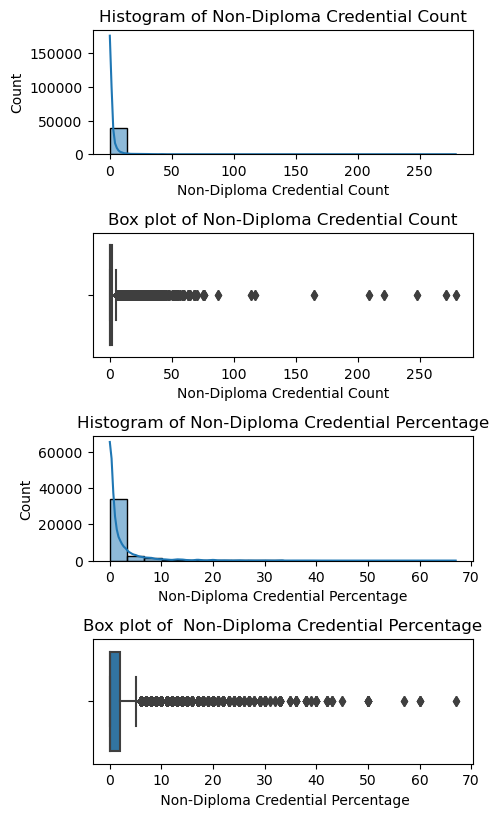

In [30]:
# Define the figure
plt.figure(figsize=(5, 18))

# Adjust the distance between the plots
plt.subplots_adjust(hspace=0.6)

### Histogram 1 ###
plt.subplot(911) # Position
plt.title("Histogram of Non-Diploma Credential Count") # Title
sns.histplot(data=df, x='non_diploma_credential_cnt', bins=20, kde=True)
plt.xlabel("Non-Diploma Credential Count")

### Box plot 1 ###
plt.subplot(912) # Position
plt.title("Box plot of Non-Diploma Credential Count") # Title
sns.boxplot(data=df, x="non_diploma_credential_cnt")
plt.xlabel("Non-Diploma Credential Count")

### Histogram 2 ###
plt.subplot(913) # Position
plt.title("Histogram of Non-Diploma Credential Percentage") # Title
sns.histplot(data=df, x="non_diploma_credential_pct", bins=20, kde=True)
plt.xlabel( "Non-Diploma Credential Percentage")

### Box plot 2 ###
plt.subplot(914) # Position
plt.title("Box plot of  Non-Diploma Credential Percentage") # Title
sns.boxplot(data=df, x="non_diploma_credential_pct")
plt.xlabel(" Non-Diploma Credential Percentage")

# Show the plots
plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()

The histogram of the number of non-diploma certificates illustrates the frequency distribution, showing a right-skewed distribution with most of the data points clustered between 0 and 50. The corresponding box-and-line plot shows the distribution and dispersion of the data, where the median is close to zero but there are several outliers. A similar pattern is observed in the histogram of non-diploma certificate percentages, where most data points are clustered at the low end of the range, reflecting the distribution of the data. The box plot of the percentage of non-diploma certificates shows a similar trend, where the median is close to zero, while several outliers are present.

### Still Enrolled

In [31]:
# Convert grad_pct column to string
df['still_enr_pct'] = df['still_enr_pct'].astype(str)

# Remove percentage sign and convert to numeric
df['still_enr_pct'] = df['still_enr_pct'].str.rstrip('%').astype(float)
df['still_enr_cnt'] = df['still_enr_cnt'].astype(float)

# Count NaN values by column
nan_count_by_column = df.isna().sum()

# Total rows
total_rows = len(df)

# Describe the selected columns
df[['still_enr_cnt','still_enr_pct']].describe()

,still_enr_cnt,still_enr_pct
count,39674.000000,39674.000000
mean,11.299516,5.190704
std,40.766672,8.832710
min,0.000000,0.000000
25%,0.000000,0.000000
50%,2.000000,2.000000
75%,5.000000,6.000000
max,1381.000000,100.000000


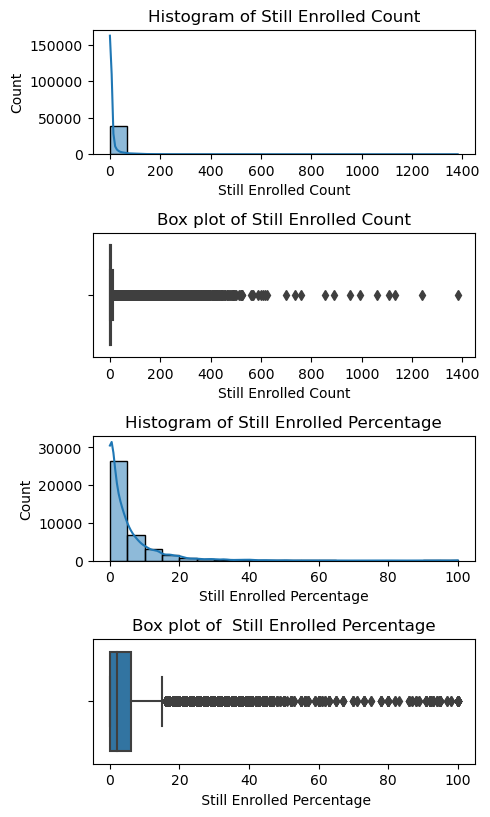

In [32]:
# Define the figure
plt.figure(figsize=(5, 18))

# Adjust the distance between the plots
plt.subplots_adjust(hspace=0.6)

### Histogram 1 ###
plt.subplot(911) # Position
plt.title("Histogram of Still Enrolled Count") # Title
sns.histplot(data=df, x='still_enr_cnt', bins=20, kde=True)
plt.xlabel("Still Enrolled Count")

### Box plot 1 ###
plt.subplot(912) # Position
plt.title("Box plot of Still Enrolled Count") # Title
sns.boxplot(data=df, x="still_enr_cnt")
plt.xlabel("Still Enrolled Count")

### Histogram 2 ###
plt.subplot(913) # Position
plt.title("Histogram of Still Enrolled Percentage") # Title
sns.histplot(data=df, x="still_enr_pct", bins=20, kde=True)
plt.xlabel( "Still Enrolled Percentage")

### Box plot 2 ###
plt.subplot(914) # Position
plt.title("Box plot of  Still Enrolled Percentage") # Title
sns.boxplot(data=df, x="still_enr_pct")
plt.xlabel(" Still Enrolled Percentage")

# Show the plots
plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()

The histogram of the number of students still enrolled shows a right-skewed distribution with the majority of the student numbers distributed between 0 and 200. The corresponding box-and-line plot demonstrates the distribution of the quantity data, including the presence of outliers. In the histogram of percentage of students still enrolled, it was observed that the majority of the percentages were clustered between 0 and 20%, reflecting the distribution of the data. The box-and-line plot of the percent of students still enrolled depicts a similar trend, including the percentiles and outliers present.

### GED

In [33]:
# Convert grad_pct column to string
df['ged_pct'] = df['ged_pct'].astype(str)

# Remove percentage sign and convert to numeric
df['ged_pct'] = df['ged_pct'].str.rstrip('%').astype(float)
df['ged_cnt'] = df['ged_cnt'].astype(float)

# Count NaN values by column
nan_count_by_column = df.isna().sum()

# Total rows
total_rows = len(df)

# Describe the selected columns
df[['ged_cnt','ged_pct']].describe()

,ged_cnt,ged_pct
count,39674.000000,39674.000000
mean,1.377577,0.612693
std,4.949389,1.985445
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,97.000000,67.000000


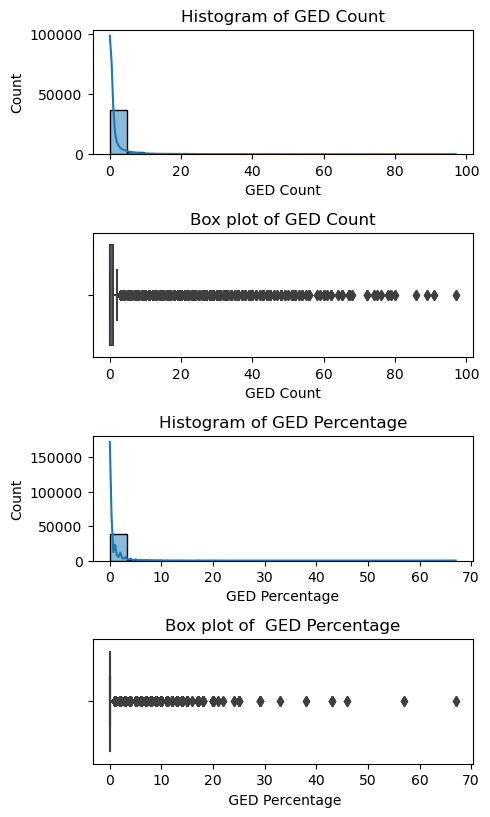

In [34]:
# Define the figure
plt.figure(figsize=(5, 18))

# Adjust the distance between the plots
plt.subplots_adjust(hspace=0.6)

### Histogram 1 ###
plt.subplot(911) # Position
plt.title("Histogram of GED Count") # Title
sns.histplot(data=df, x='ged_cnt', bins=20, kde=True)
plt.xlabel("GED Count")

### Box plot 1 ###
plt.subplot(912) # Position
plt.title("Box plot of GED Count") # Title
sns.boxplot(data=df, x="ged_cnt")
plt.xlabel("GED Count")

### Histogram 2 ###
plt.subplot(913) # Position
plt.title("Histogram of GED Percentage") # Title
sns.histplot(data=df, x="ged_pct", bins=20, kde=True)
plt.xlabel( "GED Percentage")

### Box plot 2 ###
plt.subplot(914) # Position
plt.title("Box plot of  GED Percentage") # Title
sns.boxplot(data=df, x="ged_pct")
plt.xlabel(" GED Percentage")

# Show the plots
plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()

The histogram of GED counts shows a heavily left-skewed distribution with the majority of counts near zero. The boxplot shows that the data points are mainly concentrated at the lower end of the GED counts, but there are a few outliers extending into the higher count range. In the GED percentage histogram, a similar situation to the GED count histogram is observed, with the majority of the percentages being lower, showing a trend toward a left-skewed distribution.The GED percentage box line plot demonstrates that many of the data points are clustered at the lower percentage end of the range, with a few outliers present as well. The statistical description of these data shows a mean of about 1.38 with a standard deviation of about 4.95 for GED counts and a mean of about 0.61 with a standard deviation of about 1.99 for GED percentages.

### Dropout

In [35]:
# Convert grad_pct column to string
df['dropout_pct'] = df['dropout_pct'].astype(str)

# Remove percentage sign and convert to numeric
df['dropout_pct'] = df['dropout_pct'].str.rstrip('%').astype(float)
df['dropout_cnt'] = df['dropout_cnt'].astype(float)

# Count NaN values by column
nan_count_by_column = df.isna().sum()

# Total rows
total_rows = len(df)

# Describe the selected columns
df[['dropout_cnt','dropout_pct']].describe()

,dropout_cnt,dropout_pct
count,39674.000000,39674.000000
mean,16.239225,7.963049
std,50.129834,9.658698
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,5.000000
75%,9.000000,11.000000
max,1091.000000,100.000000


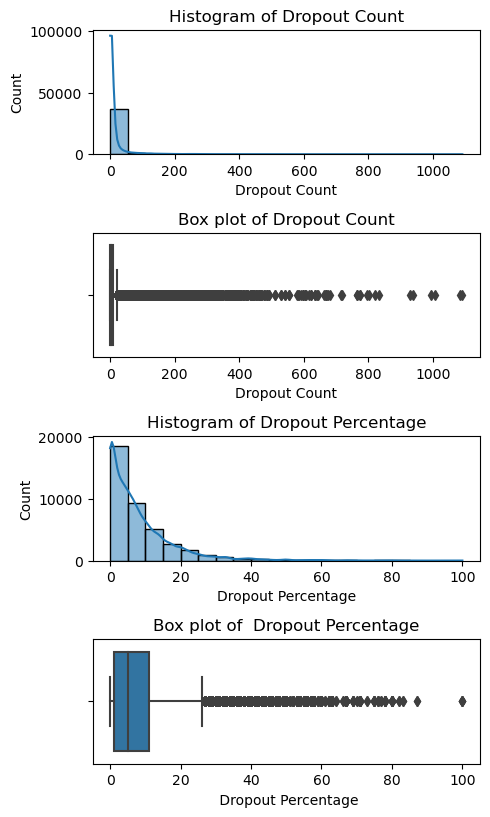

In [36]:
# Define the figure
plt.figure(figsize=(5, 18))

# Adjust the distance between the plots
plt.subplots_adjust(hspace=0.6)

### Histogram 1 ###
plt.subplot(911) # Position
plt.title("Histogram of Dropout Count") # Title
sns.histplot(data=df, x='dropout_cnt', bins=20, kde=True)
plt.xlabel("Dropout Count")

### Box plot 1 ###
plt.subplot(912) # Position
plt.title("Box plot of Dropout Count") # Title
sns.boxplot(data=df, x="dropout_cnt")
plt.xlabel("Dropout Count")

### Histogram 2 ###
plt.subplot(913) # Position
plt.title("Histogram of Dropout Percentage") # Title
sns.histplot(data=df, x="dropout_pct", bins=20, kde=True)
plt.xlabel( "Dropout Percentage")

### Box plot 2 ###
plt.subplot(914) # Position
plt.title("Box plot of  Dropout Percentage") # Title
sns.boxplot(data=df, x="dropout_pct")
plt.xlabel(" Dropout Percentage")

# Show the plots
plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()

The histogram of the number of dropouts shows the frequency distribution of the number of dropouts, showing peaks at the low end, indicating a low number of dropouts in most cases. The box line plot shows the distribution and dispersion of the number of dropouts with several outliers labeled. The percent dropout histogram shows a gradual decrease in frequency as the percent dropout increases. The Percentage Dropout box line plot demonstrates the distribution and degree of dispersion of the percentage of dropouts with a few outliers at the high end of the scale. Considering the statistics of the data together, the mean value of the number of dropouts is about 16.24 with a standard deviation of about 50.13, while the mean value of the percentage of dropouts is about 7.96 with a standard deviation of about 9.66.

## Bivariate EDA

### NRC Code vs Dropout Count

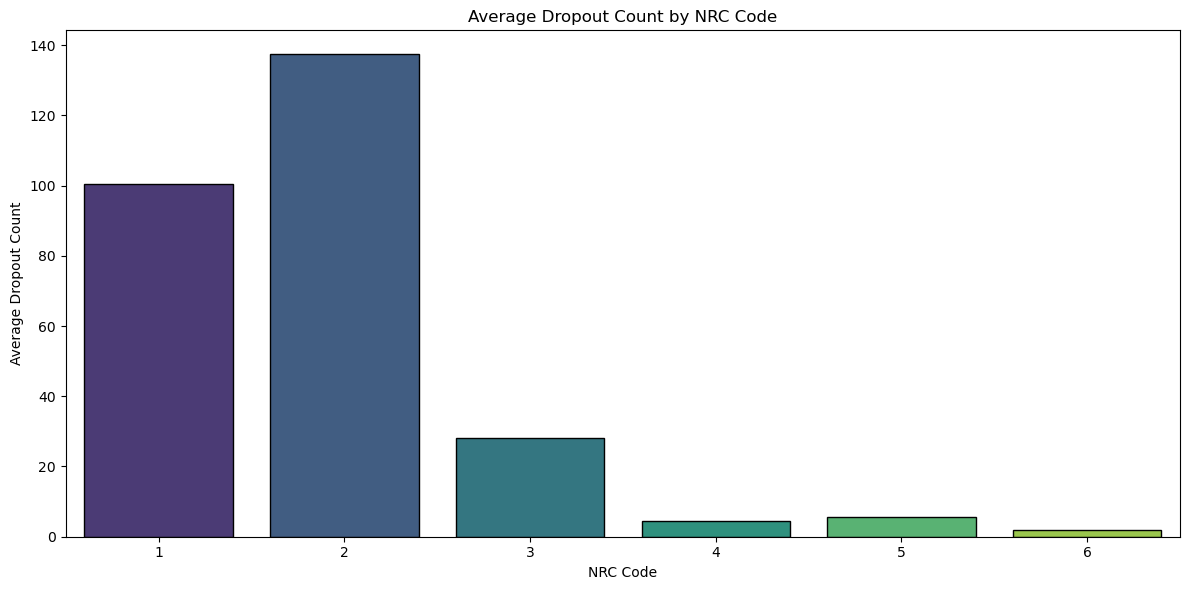

In [37]:
# Replace non-numeric 'dropout_cnt' values with NaN and convert the column to floats
df['dropout_cnt'] = pd.to_numeric(df['dropout_cnt'], errors='coerce')

# Drop NaN values from 'dropout_cnt' to calculate the average
df_filtered = df.dropna(subset=['dropout_cnt'])

# Calculate the average dropout count for each NRC Code
avg_dropout_count = df_filtered.groupby('nrc_code')['dropout_cnt'].mean().reset_index()

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_dropout_count, x='nrc_code', y='dropout_cnt', palette='viridis', edgecolor='black')
plt.title('Average Dropout Count by NRC Code')
plt.xlabel('NRC Code')
plt.ylabel('Average Dropout Count')
plt.tight_layout()
plt.show()

The bar graph titled “Average Dropout Count by NRC Code” provides insights into dropout rates based on different NRC codes. Notably, NRC Code ‘2’ has the highest average dropout count, exceeding 130, while NRC Code ‘1’ closely follows with an average dropout count just above 100. In contrast, NRC Codes ‘3’, ‘4’, ‘5’, and ‘6’ exhibit significantly lower average dropout counts, each below 20. 

### County Code vs Dropout Count

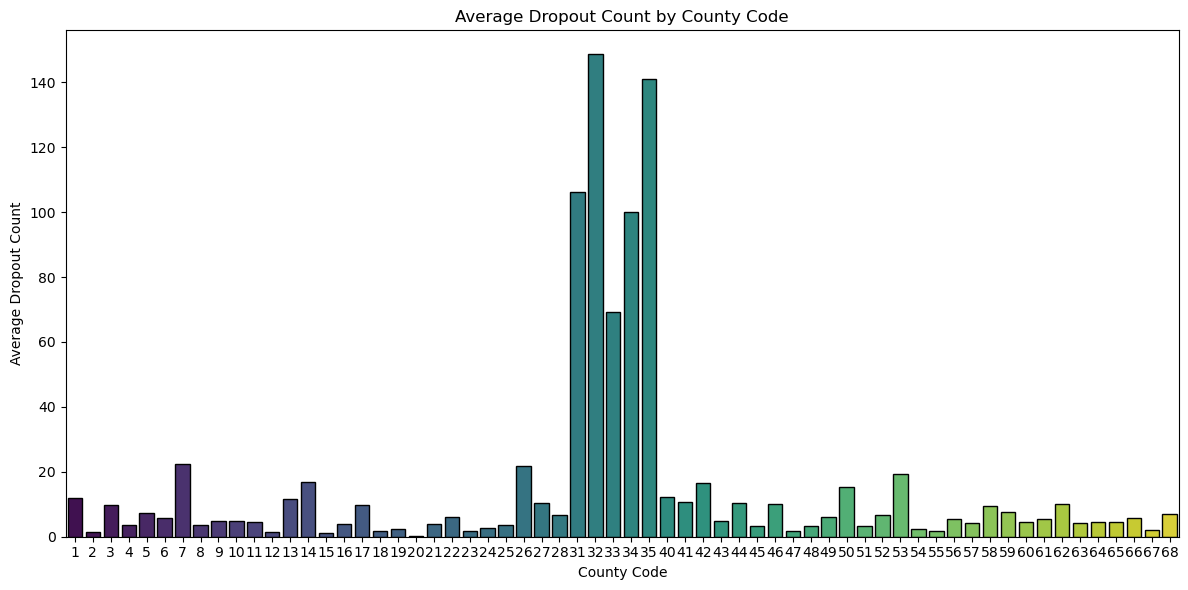

In [38]:
# Replace non-numeric 'dropout_cnt' values with NaN and convert the column to floats
df['dropout_cnt'] = pd.to_numeric(df['dropout_cnt'], errors='coerce')

# Drop NaN values from 'dropout_cnt' to calculate the average
df_filtered = df.dropna(subset=['dropout_cnt'])

# Calculate the average dropout count for each NRC Code
avg_dropout_count = df_filtered.groupby('county_code')['dropout_cnt'].mean().reset_index()

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_dropout_count, x='county_code', y='dropout_cnt', palette='viridis', edgecolor='black')
plt.title('Average Dropout Count by County Code')
plt.xlabel('County Code')
plt.ylabel('Average Dropout Count')
plt.tight_layout()
plt.show()

The histogram shows the distribution of the average number of dropouts for different county codes. Most of the county codes have a low average number of dropouts, presented as purple and green/yellow bars ranging from 0 to 140. However, there are three county codes that have significantly higher average dropout numbers than other counties, showing blue-green bars that stand out across the distribution. This suggests that these counties have a more serious dropout problem and need targeted measures to address it.

### NYC Ind vs Dropout Count

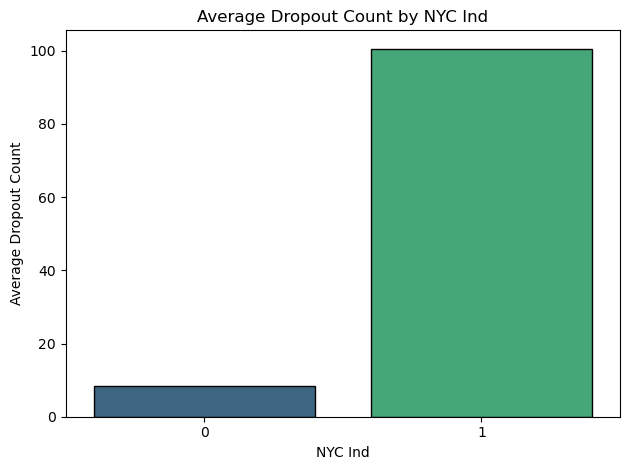

In [39]:
# Replace non-numeric 'dropout_cnt' values with NaN and convert the column to floats
df['dropout_cnt'] = pd.to_numeric(df['dropout_cnt'], errors='coerce')

# Drop NaN values from 'dropout_cnt' to calculate the average
df_filtered = df.dropna(subset=['dropout_cnt'])

# Calculate the average dropout count for each NRC Code
avg_dropout_count = df_filtered.groupby('nyc_ind')['dropout_cnt'].mean().reset_index()

# Plotting using seaborn
sns.barplot(data=avg_dropout_count, x='nyc_ind', y='dropout_cnt', palette='viridis', edgecolor='black')
plt.title('Average Dropout Count by NYC Ind')
plt.xlabel('NYC Ind')
plt.ylabel('Average Dropout Count')
plt.tight_layout()
plt.show()

This horizontal bar graph shows the differences in the average number of dropouts in individual sectors in New York City. Categorized by nyc_ind (which indicates whether a school district is located within the New York City boundaries), category '1' has a significantly higher average number of dropouts than category '0'. Specifically, the average number of dropouts in category '0' is close to 0, while the average number of dropouts in category '1' is as high as 100, suggesting that the dropout problem may be more severe in certain sectors of New York City and that more targeted dropout prevention measures and support programs may be needed for these areas.

### First Enrolled  School Year vs Dropout Count

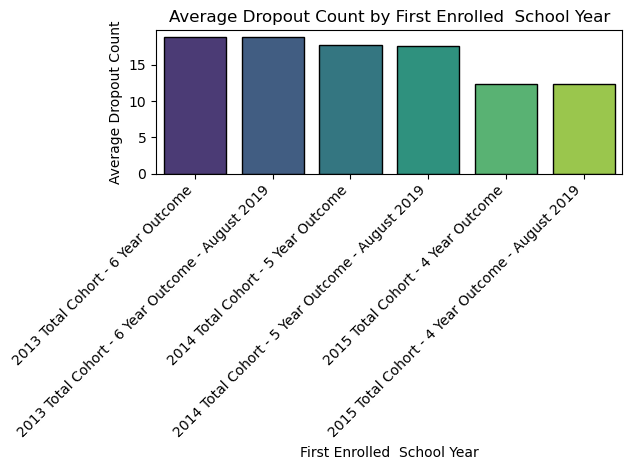

In [40]:
# Replace non-numeric 'dropout_cnt' values with NaN and convert the column to floats
df['dropout_cnt'] = pd.to_numeric(df['dropout_cnt'], errors='coerce')

# Drop NaN values from 'dropout_cnt' to calculate the average
df_filtered = df.dropna(subset=['dropout_cnt'])

# Calculate the average dropout count for each NRC Code
avg_dropout_count = df_filtered.groupby('membership_desc')['dropout_cnt'].mean().reset_index()

# Plotting using seaborn
sns.barplot(data=avg_dropout_count, x='membership_desc', y='dropout_cnt', palette='viridis', edgecolor='black')
plt.title('Average Dropout Count by First Enrolled  School Year')
plt.xlabel('First Enrolled  School Year')
plt.ylabel('Average Dropout Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar chart illustrates the average number of dropouts for students in different first-time enrollment years. the x-axis represents the year of enrollment, from fall 2013 to fall 2015, and the y-axis represents the average number of dropouts, which ranges from 0 to 17.5. the chart shows that the average number of first-time enrollment dropouts has been trending downward over time. Specifically, the average number of dropouts is highest for students enrolled in the fall of 2013, at about 17.5, while by students enrolled in the fall of 2025, the average number of dropouts decreases to about 5. This indicates a gradual decrease in dropout rates among first-time students in different years.

### Subgroup Code vs Dropout Count

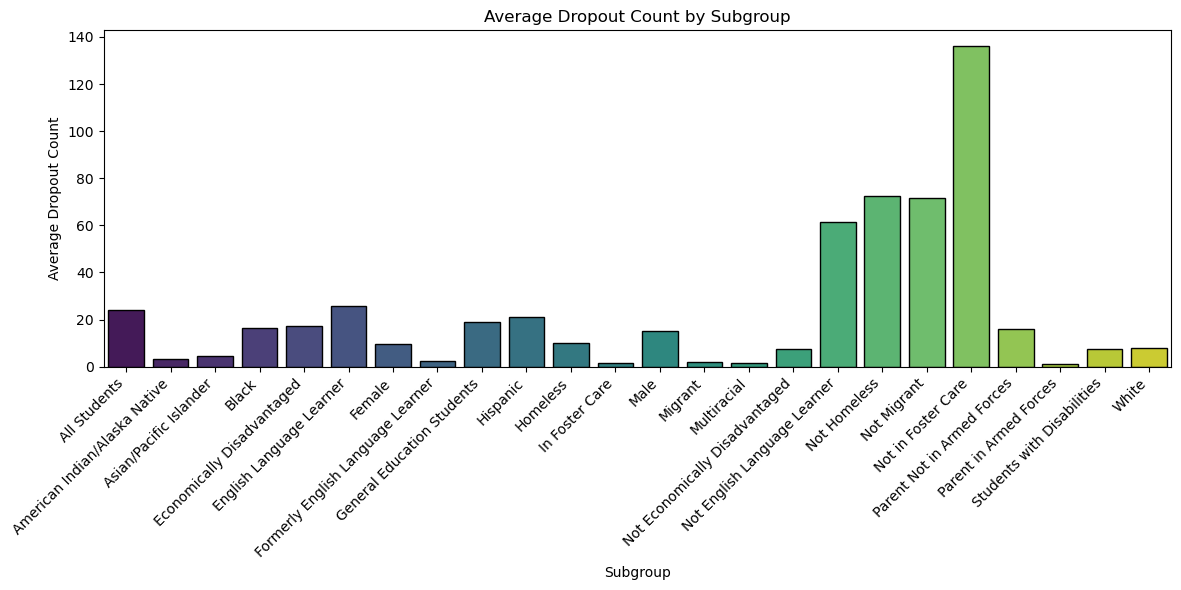

In [41]:
# Replace non-numeric 'dropout_cnt' values with NaN and convert the column to floats
df['dropout_cnt'] = pd.to_numeric(df['dropout_cnt'], errors='coerce')

# Drop NaN values from 'dropout_cnt' to calculate the average
df_filtered = df.dropna(subset=['dropout_cnt'])

# Calculate the average dropout count for each NRC Code
avg_dropout_count = df_filtered.groupby('subgroup_name')['dropout_cnt'].mean().reset_index()

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_dropout_count, x='subgroup_name', y='dropout_cnt', palette='viridis', edgecolor='black')
plt.title('Average Dropout Count by Subgroup')
plt.xlabel('Subgroup')
plt.ylabel('Average Dropout Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This is a bar chart showing the average number of dropouts in different subgroups. The horizontal axis represents the different subgroup codes ranging from 1 to 25 and the vertical axis represents the average number of dropouts ranging from 0 to 140.The type of chart is a bar chart and the number of dropouts varies significantly between subgroups. The data is represented by different heights of bars for different subgroups, with some bars being significantly higher than others, indicating that the average number of dropouts is higher for those particular subgroups. However, the average number of dropouts is generally low, with the highest being in the subgroup of 23.

### Enroll Count vs Dropout Count

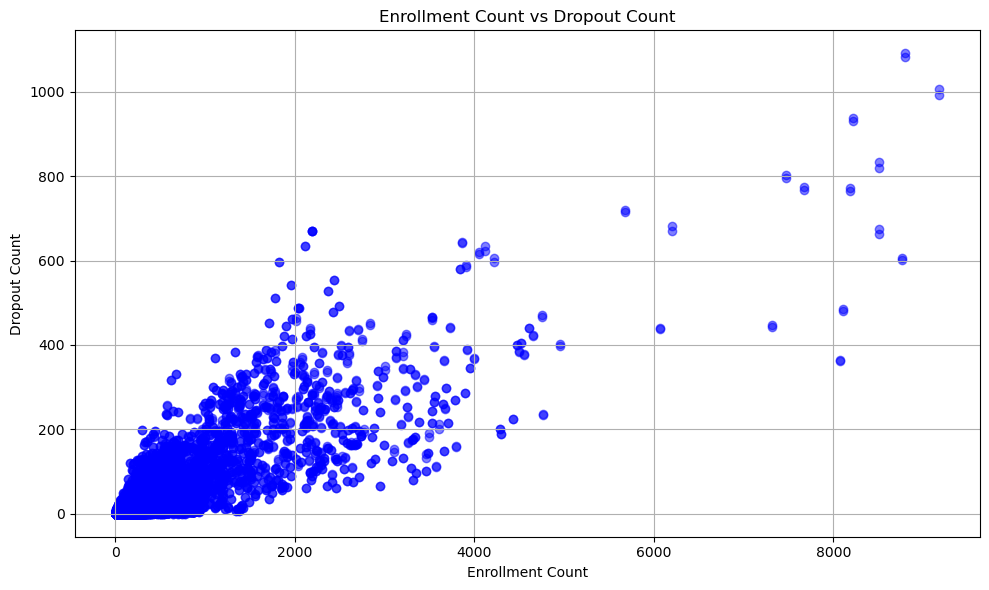

In [42]:
# Replace non-numeric 'enroll_cnt' and 'dropout_cnt' values with NaN and convert columns to floats
df['enroll_cnt'] = pd.to_numeric(df['enroll_cnt'], errors='coerce')
df['dropout_cnt'] = pd.to_numeric(df['dropout_cnt'], errors='coerce')

# Drop rows where both 'enroll_cnt' and 'dropout_cnt' are not available
df_filtered = df.dropna(subset=['enroll_cnt', 'dropout_cnt'])

# Extract data for scatter plot
enrollment_counts = df_filtered['enroll_cnt']
dropout_counts = df_filtered['dropout_cnt']

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(enrollment_counts, dropout_counts, alpha=0.5, color='blue')
plt.title('Enrollment Count vs Dropout Count')
plt.xlabel('Enrollment Count')
plt.ylabel('Dropout Count')
plt.grid(True)
plt.tight_layout()
plt.show()

This is a scatter plot showing the relationship between the number of registrations and the number of exits. The data shows that at lower enrollments there are higher dropouts, and as enrollments increase, the number of dropouts also tends to increase. the x-axis is labeled "enrollments" and ranges from 0 to 8000; the y-axis is labeled "dropouts" and ranges from 0 to 1000. the data points are mainly concentrated in the lower left corner, and as enrollments increase, the data points increase. The data points are mainly concentrated in the lower left corner, with fewer data points but more evenly distributed on the dropout axis as the number of registrations increases. This implies that as the number of registrations increases, the number of withdrawals also increases, showing a positive correlation.

### Graduated Count vs Dropout Count

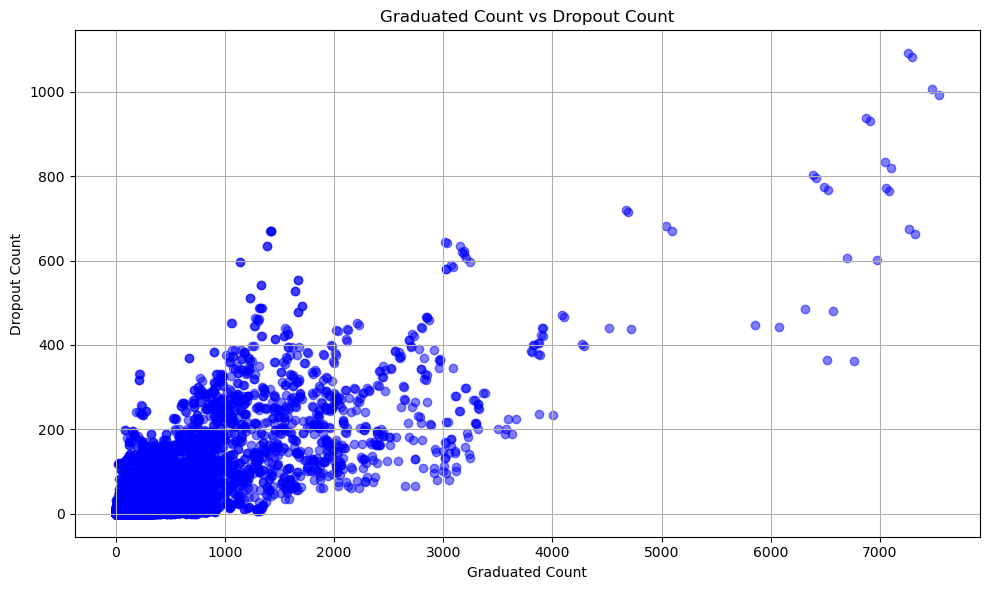

In [43]:
# Replace non-numeric 'grad_cnt' and 'dropout_cnt' values with NaN and convert columns to floats
df['grad_cnt'] = pd.to_numeric(df['grad_cnt'], errors='coerce')
df['dropout_cnt'] = pd.to_numeric(df['dropout_cnt'], errors='coerce')

# Drop rows where both 'grad_cnt' and 'dropout_cnt' are not available
df_filtered = df.dropna(subset=['grad_cnt', 'dropout_cnt'])

# Extract data for scatter plot
grad_counts = df_filtered['grad_cnt']
dropout_counts = df_filtered['dropout_cnt']

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(grad_counts, dropout_counts, alpha=0.5, color='blue')
plt.title('Graduated Count vs Dropout Count')
plt.xlabel('Graduated Count')
plt.ylabel('Dropout Count')
plt.grid(True)
plt.tight_layout()
plt.show()

The horizontal axis of this scatterplot is labeled "number of graduates," which ranges from 0 to 7,000, and the vertical axis is labeled "number of dropouts," which ranges from 0 to 1,000. The blue dots on the plot represent data points, which are clustered in the lower-left corner, meaning that the number of dropouts is higher when the number of graduates is lower. This means that the number of dropouts is higher when the number of graduates is lower. There are some scattered data points in the upper right corner, which indicate that both dropout and graduation numbers are high, but this is a rare occurrence. Taken together, the graph clearly shows a positive correlation between the number of graduates and the number of dropouts: as the number of graduates increases, so does the number of dropouts.

### Graduated Percentage vs Dropout Count

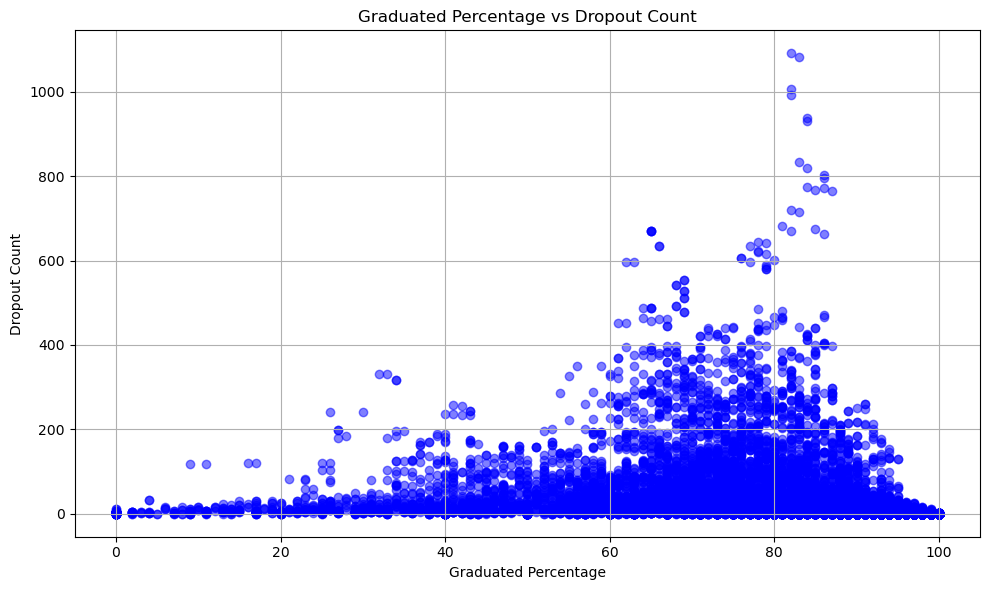

In [44]:
# Replace non-numeric 'grad_pct' and 'dropout_cnt' values with NaN and convert columns to floats
df['grad_pct'] = pd.to_numeric(df['grad_pct'], errors='coerce')
df['dropout_cnt'] = pd.to_numeric(df['dropout_cnt'], errors='coerce')

# Drop rows where both 'grad_pct' and 'dropout_cnt' are not available
df_filtered = df.dropna(subset=['grad_pct', 'dropout_cnt'])

# Extract data for scatter plot
grad_percentages = df_filtered['grad_pct']
dropout_counts = df_filtered['dropout_cnt']

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(grad_percentages, dropout_counts, alpha=0.5, color='blue')
plt.title('Graduated Percentage vs Dropout Count')
plt.xlabel('Graduated Percentage')
plt.ylabel('Dropout Count')
plt.grid(True)
plt.tight_layout()
plt.show()

The horizontal axis of the scatterplot is labeled "Percentage Graduation" and ranges from 0 to 100, while the vertical axis is labeled "Number of Dropouts" and ranges from 0 to 1,000.The blue dots in the scatterplot represent the data points, which are mainly distributed between 40 and 80 on the percentage graduation axis. In particular, the data points are concentrated at the lower end of the dropout range, especially around 200. However, there are some outliers above 800 on the number of dropouts axis.

### Local Count vs Dropout Count

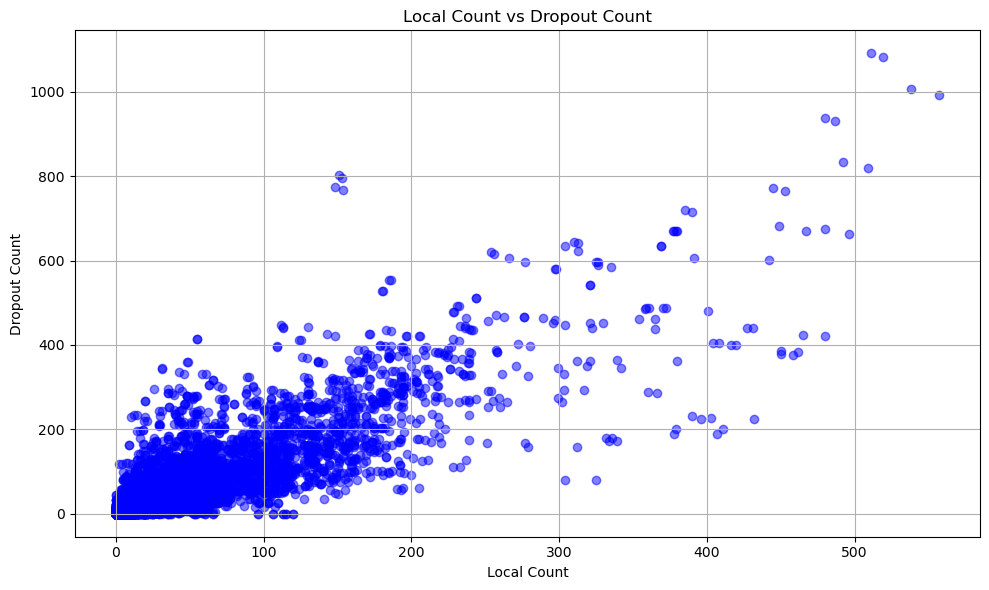

In [45]:
# Replace non-numeric 'local_cnt' and 'dropout_cnt' values with NaN and convert columns to floats
df['local_cnt'] = pd.to_numeric(df['local_cnt'], errors='coerce')
df['dropout_cnt'] = pd.to_numeric(df['dropout_cnt'], errors='coerce')

# Drop rows where both 'local_cnt' and 'dropout_cnt' are not available
df_filtered = df.dropna(subset=['local_cnt', 'dropout_cnt'])

# Extract data for scatter plot
local_counts = df_filtered['local_cnt']
dropout_counts = df_filtered['dropout_cnt']

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(local_counts, dropout_counts, alpha=0.5, color='blue')
plt.title('Local Count vs Dropout Count')
plt.xlabel('Local Count')
plt.ylabel('Dropout Count')
plt.grid(True)
plt.tight_layout()
plt.show()

The horizontal axis of the scatterplot represents the "Local Count", which ranges from 0 to 500, and the vertical axis represents the "Dropout Count", which ranges from 0 to 1,000. blue dots represent individual data points, which are scattered on the chart. It is observed that there is a concentration of data points in the low value region of both axes, especially between 0 and 200 for Local Count and below 400 for Dropout Count. In the high value areas of both axes, there are fewer and sporadic data points.

### Local Percentage vs Dropout Count

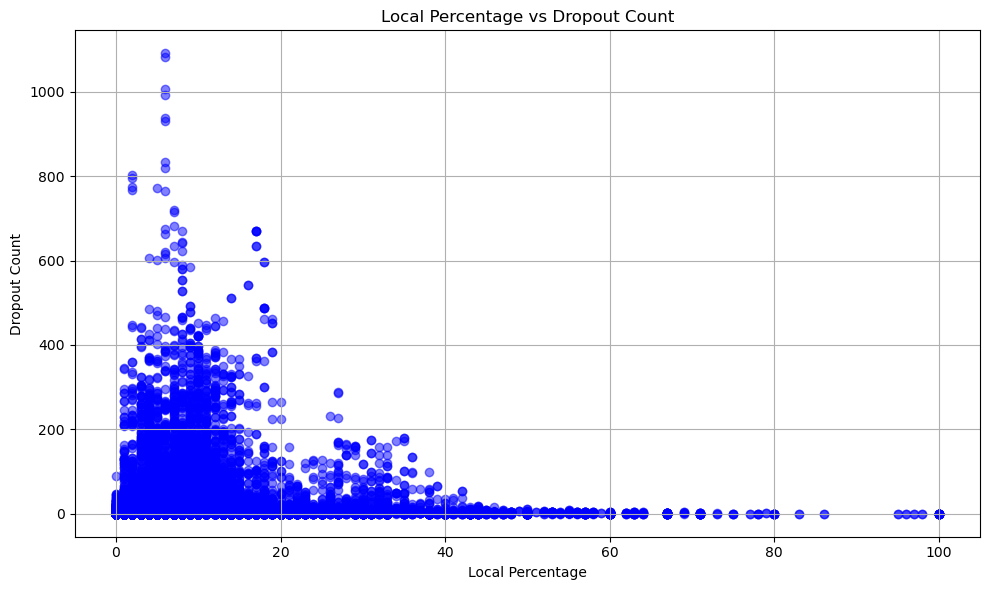

In [46]:
# Replace non-numeric 'local_pct' and 'dropout_cnt' values with NaN and convert columns to floats
df['local_pct'] = pd.to_numeric(df['local_pct'], errors='coerce')
df['dropout_cnt'] = pd.to_numeric(df['dropout_cnt'], errors='coerce')

# Drop rows where both 'local_pct' and 'dropout_cnt' are not available
df_filtered = df.dropna(subset=['local_pct', 'dropout_cnt'])

# Extract data for scatter plot
local_percentages = df_filtered['local_pct']
dropout_counts = df_filtered['dropout_cnt']

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(local_percentages, dropout_counts, alpha=0.5, color='blue')
plt.title('Local Percentage vs Dropout Count')
plt.xlabel('Local Percentage')
plt.ylabel('Dropout Count')
plt.grid(True)
plt.tight_layout()
plt.show()

The scatterplot has an x-axis labeled "Local Percentage" ranging from 0 to 100 and a y-axis labeled "Number of Dropouts" ranging from 0 to 1,000. The blue data points are clustered mainly in the lower left quadrant of the graph, indicating that at lower local percentages, the number of dropouts is higher, concentrated around the 0 to 200 range. The blue data points in the graph are mainly clustered in the lower left quadrant of the graph, which indicates that at lower local percentages, the number of dropouts is higher, clustered around the range 0 to 200. This illustrates the trend of higher concentration of dropouts in areas with lower local percentages.

### Regents Count vs Dropout Count

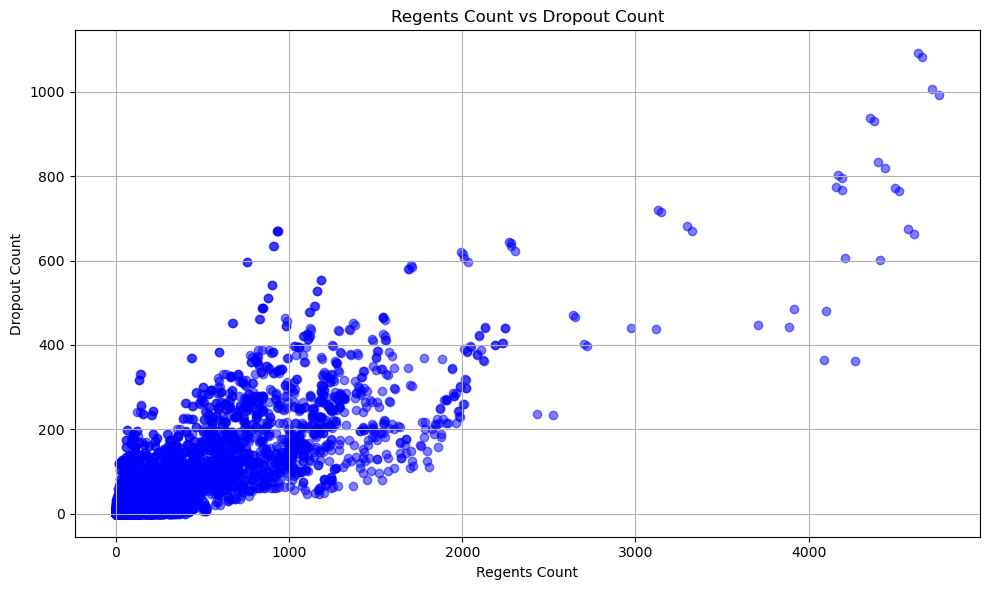

In [47]:
# Replace non-numeric 'reg_cnt' and 'dropout_cnt' values with NaN and convert columns to floats
df['reg_cnt'] = pd.to_numeric(df['reg_cnt'], errors='coerce')
df['dropout_cnt'] = pd.to_numeric(df['dropout_cnt'], errors='coerce')

# Drop rows where both 'reg_cnt' and 'dropout_cnt' are not available
df_filtered = df.dropna(subset=['reg_cnt', 'dropout_cnt'])

# Extract data for scatter plot
reg_counts = df_filtered['reg_cnt']
dropout_counts = df_filtered['dropout_cnt']

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(reg_counts, dropout_counts, alpha=0.5, color='blue')
plt.title('Regents Count vs Dropout Count')
plt.xlabel('Regents Count')
plt.ylabel('Dropout Count')
plt.grid(True)
plt.tight_layout()
plt.show()

The scatter plot shows the relationship between "Regents Count" and "Dropout Count", with the X-axis labeled "Regents Count", ranging from 0 to 4000, and the Y-axis labeled "Dropout Count", ranging from 0 to 1000. The X-axis is labeled as "Regents Count", which ranges from 0 to 4000, and the Y-axis is labeled as "Dropout Count", which ranges from 0 to 1000. The blue data points in the graph are mainly distributed in the lower left corner, which indicates that the data density is higher at low Regents and Dropout Counts. As the Regents count increases, the Dropout count shows an increasing trend, but the density of data points is lower. Taken together, this indicates that there is some positive correlation between Regents count and Dropout count.

### Regents Percentage vs Dropout Count

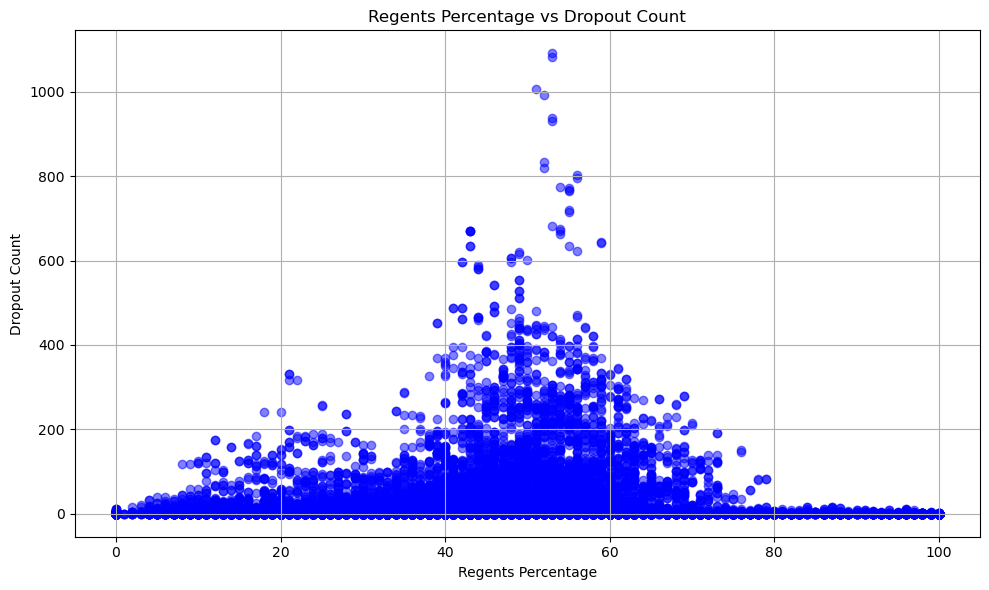

In [48]:
# Replace non-numeric 'reg_pct' and 'dropout_cnt' values with NaN and convert columns to floats
df['reg_pct'] = pd.to_numeric(df['reg_pct'], errors='coerce')
df['dropout_cnt'] = pd.to_numeric(df['dropout_cnt'], errors='coerce')

# Drop rows where both 'reg_pct' and 'dropout_cnt' are not available
df_filtered = df.dropna(subset=['reg_pct', 'dropout_cnt'])

# Extract data for scatter plot
reg_percentages = df_filtered['reg_pct']
dropout_counts = df_filtered['dropout_cnt']

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(reg_percentages, dropout_counts, alpha=0.5, color='blue')
plt.title('Regents Percentage vs Dropout Count')
plt.xlabel('Regents Percentage')
plt.ylabel('Dropout Count')
plt.grid(True)
plt.tight_layout()
plt.show()

This scatterplot has an x-axis labeled "Regents Percentage" ranging from 0 to 100 and a y-axis labeled "Dropout Count" ranging from 0 to 1000. The blue data points show the relationship between Regents Percentage and Dropout Count. The blue data points show the relationship between Regents Percentage and Dropout Count. Most of the data points are clustered in the region where the Regents percentage is around 60% and the Dropout Count is below 200. However, the number of data points decreases significantly when the Regents percentage deviates from this concentrated area. This trend suggests that the number of dropouts shows greater fluctuations when the Regents exam pass percentage is around 60% or so, but the overall number of dropouts is lower.

### Regents Advanced Count vs Dropout Count

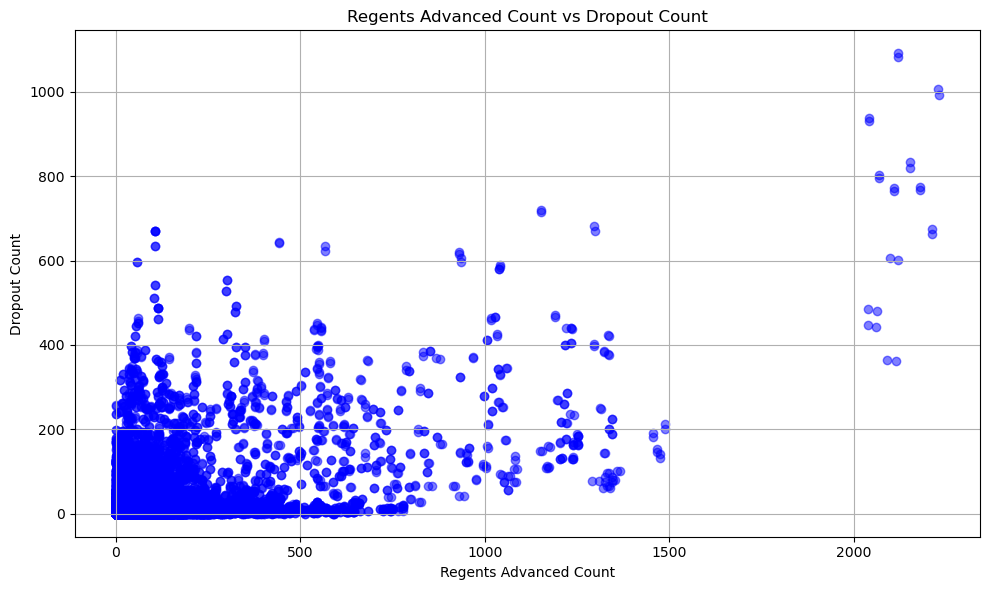

In [49]:
# Replace non-numeric 'reg_adv_cnt' and 'dropout_cnt' values with NaN and convert columns to floats
df['reg_adv_cnt'] = pd.to_numeric(df['reg_adv_cnt'], errors='coerce')
df['dropout_cnt'] = pd.to_numeric(df['dropout_cnt'], errors='coerce')

# Drop rows where both 'enroll_cnt' and 'dropout_cnt' are not available
df_filtered = df.dropna(subset=['reg_adv_cnt', 'dropout_cnt'])

# Extract data for scatter plot
reg_adv_counts = df_filtered['reg_adv_cnt']
dropout_counts = df_filtered['dropout_cnt']

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(reg_adv_counts, dropout_counts, alpha=0.5, color='blue')
plt.title('Regents Advanced Count vs Dropout Count')
plt.xlabel('Regents Advanced Count')
plt.ylabel('Dropout Count')
plt.grid(True)
plt.tight_layout()
plt.show()

The scatterplot is labeled "Regents Advanced Count" on the x-axis, ranging from 0 to 2000, and "Dropout Count" on the y-axis, ranging from 0 to 1000, with the blue dots representing the data points. The blue dots in the graph represent data points, which are concentrated in the lower left corner of the graph, showing a trend of higher dropout counts at lower Regents Advanced Counts. In addition, there are some blue dots scattered in the upper part of the graph, indicating that the dropout count is also higher at different Regents Advanced Counts.

### Regents Advanced Percentage vs Dropout Count

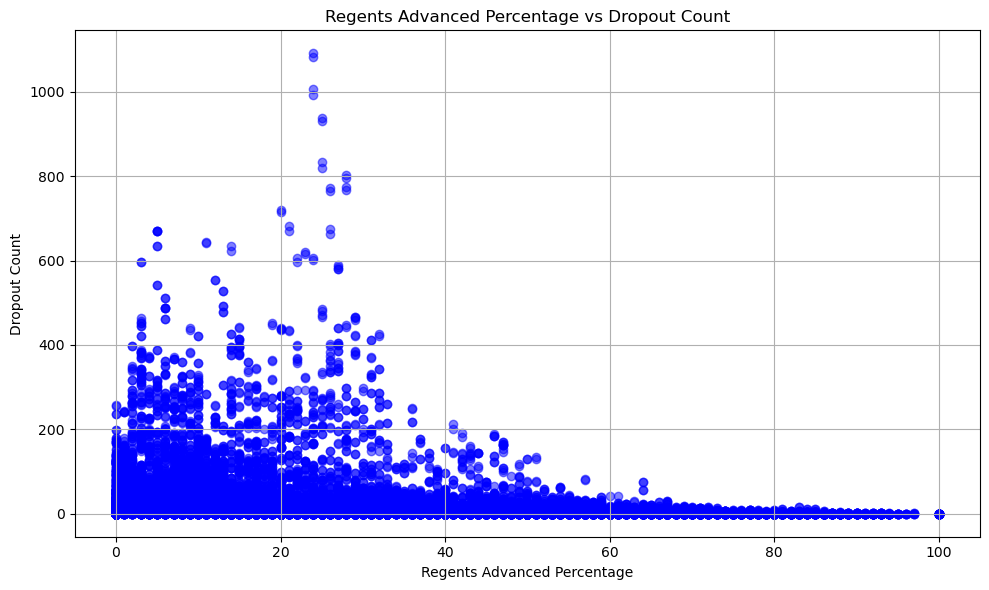

In [50]:
# Replace non-numeric 'reg_adv_pct' and 'dropout_cnt' values with NaN and convert columns to floats
df['reg_adv_pct'] = pd.to_numeric(df['reg_adv_pct'], errors='coerce')
df['dropout_cnt'] = pd.to_numeric(df['dropout_cnt'], errors='coerce')

# Drop rows where both 'enroll_cnt' and 'dropout_cnt' are not available
df_filtered = df.dropna(subset=['reg_adv_pct', 'dropout_cnt'])

# Extract data for scatter plot
reg_adv_percentages = df_filtered['reg_adv_pct']
dropout_counts = df_filtered['dropout_cnt']

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(reg_adv_percentages, dropout_counts, alpha=0.5, color='blue')
plt.title('Regents Advanced Percentage vs Dropout Count')
plt.xlabel('Regents Advanced Percentage')
plt.ylabel('Dropout Count')
plt.grid(True)
plt.tight_layout()
plt.show()

This scatterplot shows the relationship between Regents Advanced Percentage and Dropout Count. Key features include the concentration of data points in the lower left corner, especially in the range of 0-20% for "Regents Advanced Percentage" and 0-200 for "Dropout Count". The lower Regents Advanced Percentage Lower Regents Advanced Percentage seems to correlate with higher Dropout Count. The axes range from 0% to 100% for Regents Advanced Percentage on the x-axis and from 0 to 1000 for Dropout Count on the y-axis. This indicates that the number of students dropping out of school is higher at lower "Regents Advanced Percentage".

### Non-Diploma Credential Count vs Dropout Count

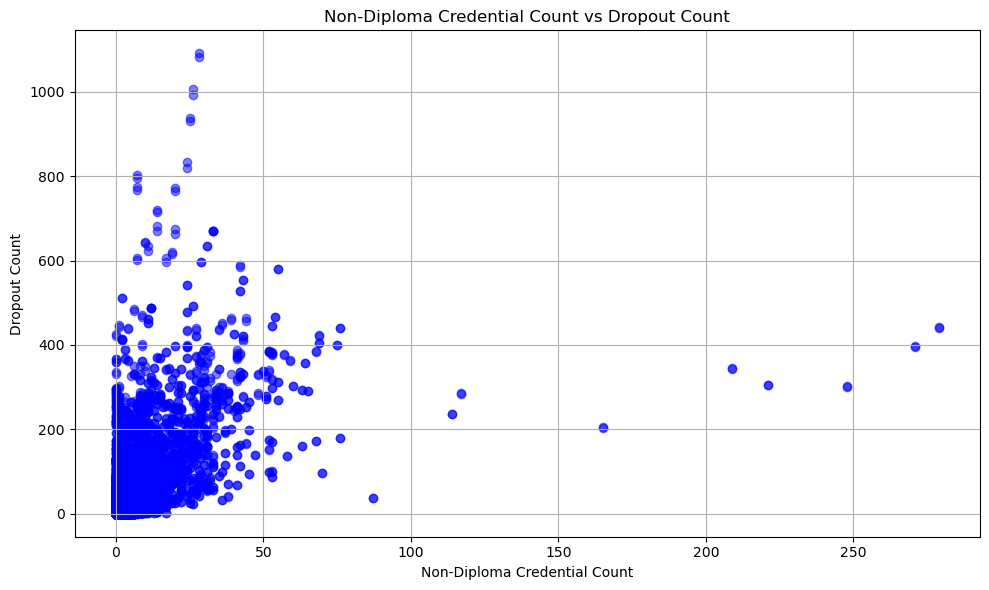

In [51]:
# Replace non-numeric 'non_diploma_credential_cnt' and 'dropout_cnt' values with NaN and convert columns to floats
df['non_diploma_credential_cnt'] = pd.to_numeric(df['non_diploma_credential_cnt'], errors='coerce')
df['dropout_cnt'] = pd.to_numeric(df['dropout_cnt'], errors='coerce')

# Drop rows where both 'non_diploma_credential_cnt' and 'dropout_cnt' are not available
df_filtered = df.dropna(subset=['non_diploma_credential_cnt', 'dropout_cnt'])

# Extract data for scatter plot
non_diploma_credential_counts = df_filtered['non_diploma_credential_cnt']
dropout_counts = df_filtered['dropout_cnt']

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(non_diploma_credential_counts, dropout_counts, alpha=0.5, color='blue')
plt.title('Non-Diploma Credential Count vs Dropout Count')
plt.xlabel('Non-Diploma Credential Count')
plt.ylabel('Dropout Count')
plt.grid(True)
plt.tight_layout()
plt.show()

The blue data points in the graph are mainly clustered in the lower left-hand corner, which indicates a denser concentration of data points where the number of non-diploma certificates and the number of dropouts are low. However, there are also some isolated blue points scattered on the right side of the chart, which indicate situations where the number of non-diploma certificates is high but the number of dropouts is still low. Overall, the graph clearly shows the trend between the number of non-diploma certificates and the number of dropouts, highlighting in particular the fact that the number of dropouts is more concentrated when the number of non-diploma certificates is low.

### Non-Diploma Credential Percentage vs Dropout Count

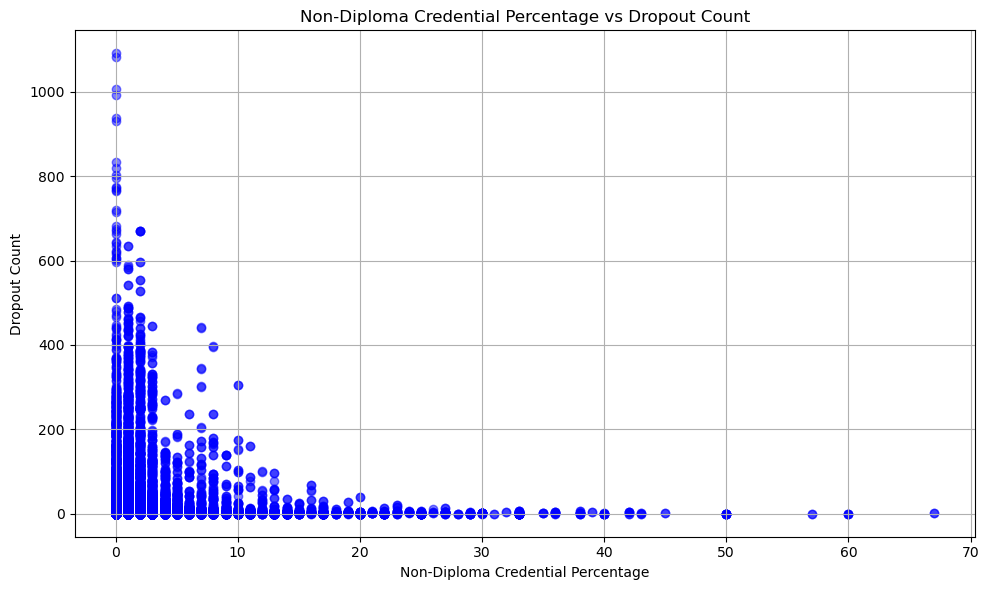

In [52]:
# Replace non-numeric 'non_diploma_credential_pct' and 'dropout_cnt' values with NaN and convert columns to floats
df['non_diploma_credential_pct'] = pd.to_numeric(df['non_diploma_credential_pct'], errors='coerce')
df['dropout_cnt'] = pd.to_numeric(df['dropout_cnt'], errors='coerce')

# Drop rows where both 'non_diploma_credential_pct' and 'dropout_cnt' are not available
df_filtered = df.dropna(subset=['non_diploma_credential_pct', 'dropout_cnt'])

# Extract data for scatter plot
non_diploma_credential_percentages = df_filtered['non_diploma_credential_pct']
dropout_counts = df_filtered['dropout_cnt']

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(non_diploma_credential_percentages, dropout_counts, alpha=0.5, color='blue')
plt.title('Non-Diploma Credential Percentage vs Dropout Count')
plt.xlabel('Non-Diploma Credential Percentage')
plt.ylabel('Dropout Count')
plt.grid(True)
plt.tight_layout()
plt.show()

Observing the distribution of data points, most of the data points are concentrated at the lower end of the non-diploma certificate percentages, indicating that the number of dropouts is higher at lower percentages. In particular, there is a significant concentration of data points between 0 and 10 percent of the NDC percentage, with the number of dropouts as high as approximately 1,000. a significant decrease in the number of dropouts is observed as the NDC percentage increases, and the data points are sparser at higher percentages. This indicates that there is a negative correlation between the percentage of non-diploma certificates and the number of dropouts, i.e., as the percentage of non-diploma certificates increases, the number of dropouts tends to decrease.

### Still Enrolled Count vs Dropout Count

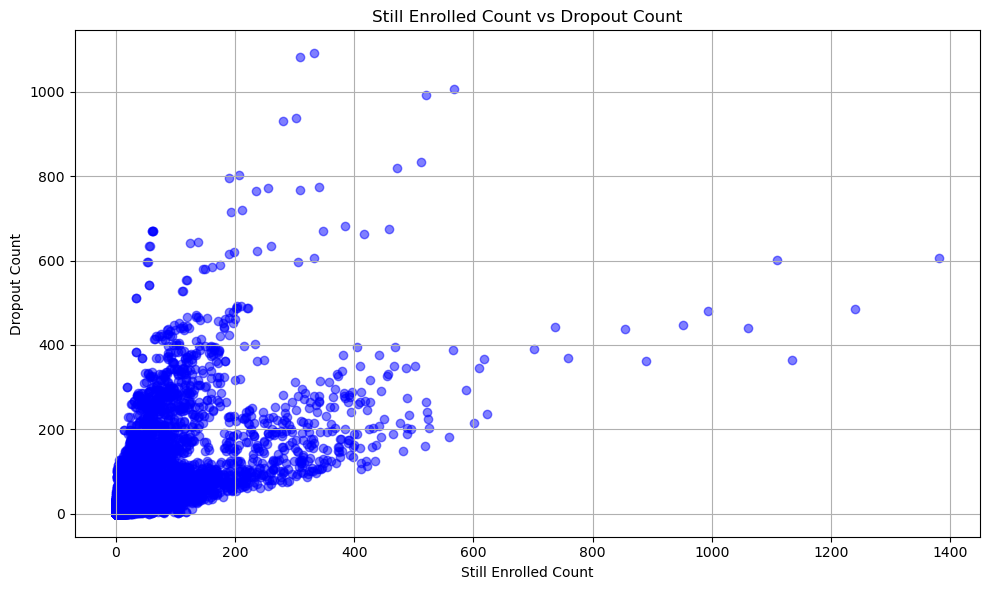

In [53]:
# Replace non-numeric 'still_enr_cnt' and 'dropout_cnt' values with NaN and convert columns to floats
df['still_enr_cnt'] = pd.to_numeric(df['still_enr_cnt'], errors='coerce')
df['dropout_cnt'] = pd.to_numeric(df['dropout_cnt'], errors='coerce')

# Drop rows where both 'still_enrolled_cnt' and 'dropout_cnt' are not available
df_filtered = df.dropna(subset=['still_enr_cnt', 'dropout_cnt'])

# Extract data for scatter plot
still_enr_counts = df_filtered['still_enr_cnt']
dropout_counts = df_filtered['dropout_cnt']

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(still_enr_counts, dropout_counts, alpha=0.5, color='blue')
plt.title('Still Enrolled Count vs Dropout Count')
plt.xlabel('Still Enrolled Count')
plt.ylabel('Dropout Count')
plt.grid(True)
plt.tight_layout()
plt.show()

This scatterplot shows the relationship between the number of students still studying and the number of dropouts.The x-axis shows the number of students still studying, ranging from 0 to 1400, and the y-axis shows the number of dropouts, ranging from 0 to 1000.Looking at the distribution of the data, most of the data points are clustered in the lower left corner of the graph, which suggests that the majority of the students are still studying and that the dropout rate is low. As the number of students still studying increases, there is an overall downward trend in the number of dropouts, although there are some outliers.

### Still Enrolled Percentage vs Dropout Count

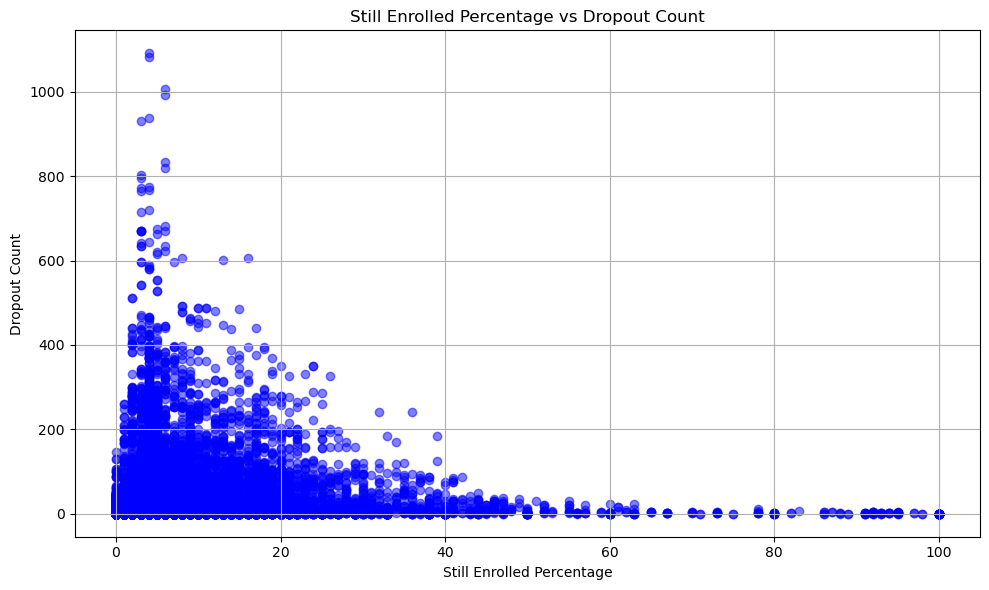

In [54]:
# Replace non-numeric 'still_enr_pct' and 'dropout_cnt' values with NaN and convert columns to floats
df['still_enr_pct'] = pd.to_numeric(df['still_enr_pct'], errors='coerce')
df['dropout_cnt'] = pd.to_numeric(df['dropout_cnt'], errors='coerce')

# Drop rows where both 'still_enrolled_pct' and 'dropout_cnt' are not available
df_filtered = df.dropna(subset=['still_enr_pct', 'dropout_cnt'])

# Extract data for scatter plot
still_enr_percentages = df_filtered['still_enr_pct']
dropout_counts = df_filtered['dropout_cnt']

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(still_enr_percentages, dropout_counts, alpha=0.5, color='blue')
plt.title('Still Enrolled Percentage vs Dropout Count')
plt.xlabel('Still Enrolled Percentage')
plt.ylabel('Dropout Count')
plt.grid(True)
plt.tight_layout()
plt.show()

This scatterplot presents the relationship between the percentage still enrolled and the number of dropouts. When the percent enrolled is 0%, the number of dropouts is usually as high as 200 or less, showing the correlation between low enrollment and high dropout numbers. As percent enrollment increases, the number of dropouts typically decreases, reflecting a negative correlation between percent enrollment and number of dropouts, although there are some outliers. The overall dataset shows a tendency for data points to be concentrated in the lower left quadrant of the chart, which further demonstrates the general trend that the higher the student enrollment rate, the lower the number of dropouts.

### GED Count vs Dropout Count

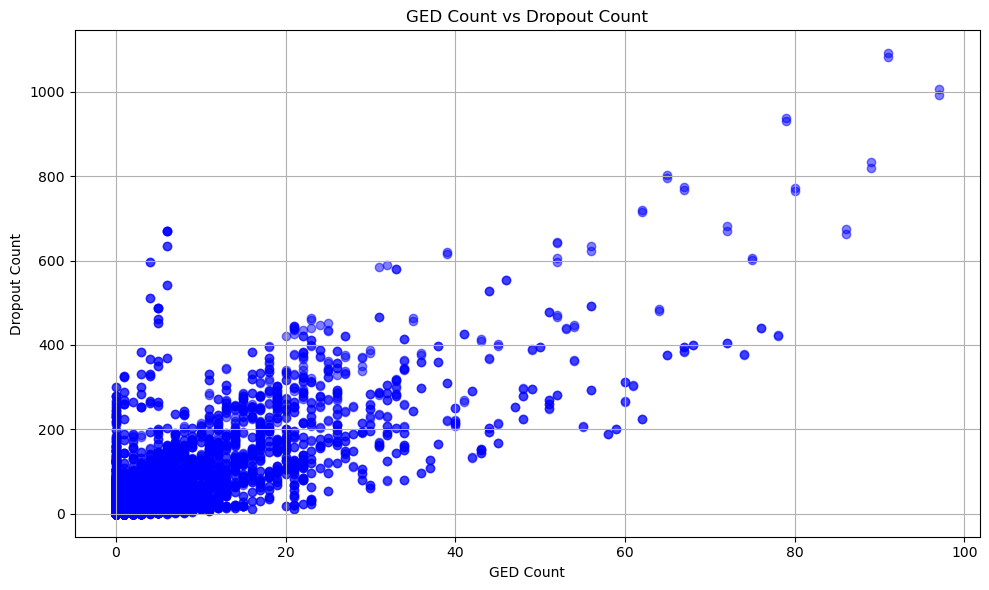

In [55]:
# Replace non-numeric 'ged_cnt' and 'dropout_cnt' values with NaN and convert columns to floats
df['ged_cnt'] = pd.to_numeric(df['ged_cnt'], errors='coerce')
df['dropout_cnt'] = pd.to_numeric(df['dropout_cnt'], errors='coerce')

# Drop rows where both 'ged_cnt' and 'dropout_cnt' are not available
df_filtered = df.dropna(subset=['ged_cnt', 'dropout_cnt'])

# Extract data for scatter plot
ged_counts = df_filtered['ged_cnt']
dropout_counts = df_filtered['dropout_cnt']

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(ged_counts, dropout_counts, alpha=0.5, color='blue')
plt.title('GED Count vs Dropout Count')
plt.xlabel('GED Count')
plt.ylabel('Dropout Count')
plt.grid(True)
plt.tight_layout()
plt.show()

As can be seen from the figure, the data points are mainly concentrated between GED counts 0-40 and dropout counts 0-400. In addition, there are some data points scattered at higher GED counts, but the dropout count stays below 1000. Overall, most of the data points are concentrated in the lower GED count and dropout count ranges, but there are some outliers that show higher GED counts but still low dropout counts.

### GED Percentage vs Dropout Count

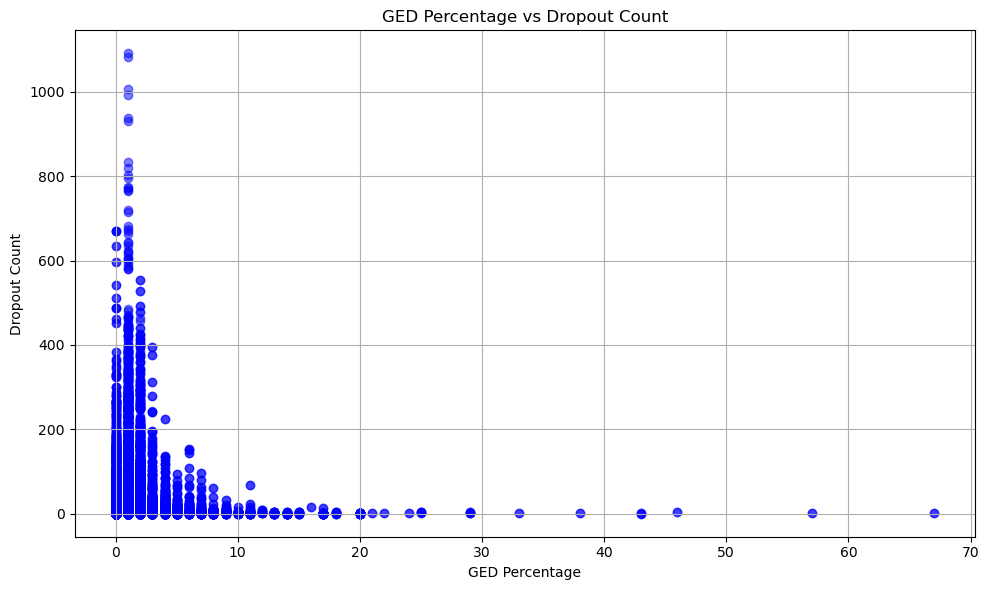

In [56]:
# Replace non-numeric 'ged_pct' and 'dropout_cnt' values with NaN and convert columns to floats
df['ged_pct'] = pd.to_numeric(df['ged_pct'], errors='coerce')
df['dropout_cnt'] = pd.to_numeric(df['dropout_cnt'], errors='coerce')

# Drop rows where both 'ged_cnt' and 'dropout_cnt' are not available
df_filtered = df.dropna(subset=['ged_pct', 'dropout_cnt'])

# Extract data for scatter plot
ged_percentages = df_filtered['ged_pct']
dropout_counts = df_filtered['dropout_cnt']

# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(ged_percentages, dropout_counts, alpha=0.5, color='blue')
plt.title('GED Percentage vs Dropout Count')
plt.xlabel('GED Percentage')
plt.ylabel('Dropout Count')
plt.grid(True)
plt.tight_layout()
plt.show()

The data points in the graph are concentrated in the lower left corner, indicating a concentration of data points at lower GED percentages and higher dropout numbers. The number of dropouts decreases significantly as the GED percentage increases, and there are very few data points after the GED percentage of about 20%. This indicates a negative correlation between the number of dropouts and the GED percentage, i.e., the higher the GED percentage, the lower the number of dropouts.

## Correlation Analysis

In [57]:
# Numeric Columns
numeric_cols = ['enroll_cnt', 
                'grad_cnt', 
                'grad_pct', 
                'local_cnt', 
                'local_pct', 
                'reg_cnt', 
                'reg_pct', 
                'reg_adv_cnt', 
                'reg_adv_pct', 
                'non_diploma_credential_cnt', 
                'non_diploma_credential_pct', 
                'still_enr_cnt', 
                'still_enr_pct', 
                'ged_cnt', 
                'ged_pct', 
                'dropout_cnt', 
                'dropout_pct']


numeric_df = df[numeric_cols]

# Calculate the correlation coefficients
correlation_matrix = numeric_df.corrwith(numeric_df["dropout_cnt"])

# Print the result
correlation_matrix

enroll_cnt                    0.846691
grad_cnt                      0.795895
grad_pct                     -0.190834
local_cnt                     0.871071
local_pct                     0.004871
reg_cnt                       0.851021
reg_pct                       0.070032
reg_adv_cnt                   0.508226
reg_adv_pct                  -0.184940
non_diploma_credential_cnt    0.584549
non_diploma_credential_pct   -0.025518
still_enr_cnt                 0.662578
still_enr_pct                 0.085551
ged_cnt                       0.793304
ged_pct                       0.058422
dropout_cnt                   1.000000
dropout_pct                   0.230815
dtype: float64

Let's save the variables with less than 0.5 correlation in a list

In [58]:
low_corr_features = ['grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct', 'non_diploma_credential_pct','still_enr_pct','ged_pct','dropout_pct']

# Data preparation: Cleaning, Feature Engineering and Feature Selection

As previously observed, many features in our dataset have almost 46% missing values, all of which are present in the same rows. Consequently, there are 46% of rows where 17 features are missing. We will not include these observations in training our model, nor will we impute these features. The amount of missing values is too high to make accurate imputations in this data, and we run the risk of skewing the distributions.

In [59]:
# Store the old dataset
df_old = df

# Drop rows with NaN values
df = df.dropna()

# Store the dataset after dropping null values in a variable
df_new = df

# Adding dummies for subgroup_name
df_dummies = pd.get_dummies(df['subgroup_name'])

# Concatenate the binary columns with the original DataFrame
df = pd.concat([df, df_dummies], axis=1)

# Drop the original subgroup_name and subgroup_code columns
df = df.drop(columns = ['subgroup_name','subgroup_code'])

After the bivariate EDA analysis, we will transform the following categorical variables into binary variables:

- **NRC Code:** This will be transformed into a binary variable indicating whether the NRC Code is either 1 or 2, as these values have a higher average of dropouts.
- **County Code:** This will be transformed into a binary variable indicating whether the County Code is either 31, 32, 33, 34, or 35, as these counties have a much higher average number of dropouts than the rest.
- **Subgroup Code:** We will only keep the binary columns for subgroups that exhibit dropout rates significantly higher than the average rates observed in the EDA.
- **First Enrolled School Year:** This will be transformed into a binary variable indicating whether the first enrolled school year is 2015 or not. This is because the year 2015 has a much lower average number of dropouts than the other years.

In [60]:
# Transform to binary
df['NRC_is_1_2'] = df['nrc_code'].isin([1,2]).astype(int)
df['County_is_31_35'] = df['county_code'].isin([31,32,33,34,35]).astype(int)
df['Enroll_Year_is_2015'] = df['membership_desc'].isin(['2015 Total Cohort - 4 Year Outcome','2015 Total Cohort - 4 Year Outcome - August 2019']).astype(int)

# Drop subgroups without significant differences in dropout rates
df = df.drop(columns= ['All Students', 
                       'American Indian/Alaska Native',
                       'Asian/Pacific Islander', 
                       'Black', 
                       'Economically Disadvantaged',
                       'English Language Learner', 
                       'Female',
                       'Formerly English Language Learner', 
                       'General Education Students',
                       'Hispanic', 
                       'Homeless', 
                       'In Foster Care', 
                       'Male', 
                       'Migrant',
                       'Multiracial', 
                       'Not Economically Disadvantaged', 
                       'Parent Not in Armed Forces',
                       'Parent in Armed Forces', 
                       'Students with Disabilities', 
                       'White'])

# Drop the old columns
df = df.drop(columns=['nrc_code','county_code', 'membership_desc'])

# Show the results
df

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_desc,county_name,nyc_ind,enroll_cnt,grad_cnt,grad_pct,...,ged_pct,dropout_cnt,dropout_pct,Not English Language Learner,Not Homeless,Not Migrant,Not in Foster Care,NRC_is_1_2,County_is_31_35,Enroll_Year_is_2015
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,658.0,464.0,71.0,...,0.0,148.0,22.0,0,0,0,0,0,0,0
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,324.0,246.0,76.0,...,0.0,65.0,20.0,0,0,0,0,0,0,0
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,334.0,218.0,65.0,...,0.0,83.0,25.0,0,0,0,0,0,0,0
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,367.0,248.0,68.0,...,0.0,91.0,25.0,0,0,0,0,0,0,0
5,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,Urban-Suburban High Needs,ALBANY,0,98.0,58.0,59.0,...,0.0,28.0,29.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73138,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,Rural High Needs,YATES,0,36.0,25.0,69.0,...,0.0,9.0,25.0,0,0,0,0,0,0,0
73142,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,Rural High Needs,YATES,0,48.0,43.0,90.0,...,0.0,5.0,10.0,0,0,0,0,0,0,0
73143,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,Rural High Needs,YATES,0,13.0,2.0,15.0,...,0.0,6.0,46.0,0,0,0,0,0,0,0
73145,2018-19,3,District,DUNDEE CENTRAL SCHOOL DISTRICT,Rural High Needs,YATES,0,33.0,23.0,70.0,...,0.0,7.0,21.0,0,0,0,0,0,0,0


Now, let's drop the duplicated rows

In [61]:
df.duplicated().sum()

15009

In [62]:
df = df.drop_duplicates()

We will also drop the non-predictive columns from our dataset.

In [63]:
# Define the columns to be dropped
non_predictive_columns = ['aggregation_type','report_school_year', 'aggregation_index', 'aggregation_name', 'nrc_desc', 'county_name']

# Drop the columns
df = df.drop(columns=non_predictive_columns)

# Show the results
df

,nyc_ind,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,...,ged_pct,dropout_cnt,dropout_pct,Not English Language Learner,Not Homeless,Not Migrant,Not in Foster Care,NRC_is_1_2,County_is_31_35,Enroll_Year_is_2015
0,0,658.0,464.0,71.0,63.0,10.0,310.0,47.0,91.0,14.0,...,0.0,148.0,22.0,0,0,0,0,0,0,0
1,0,324.0,246.0,76.0,30.0,9.0,169.0,52.0,47.0,15.0,...,0.0,65.0,20.0,0,0,0,0,0,0,0
2,0,334.0,218.0,65.0,33.0,10.0,141.0,42.0,44.0,13.0,...,0.0,83.0,25.0,0,0,0,0,0,0,0
4,0,367.0,248.0,68.0,42.0,11.0,183.0,50.0,23.0,6.0,...,0.0,91.0,25.0,0,0,0,0,0,0,0
5,0,98.0,58.0,59.0,13.0,13.0,40.0,41.0,5.0,5.0,...,0.0,28.0,29.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73099,0,33.0,32.0,97.0,3.0,9.0,26.0,79.0,3.0,9.0,...,0.0,0.0,0.0,0,0,0,0,0,0,1
73105,0,49.0,43.0,88.0,9.0,18.0,27.0,55.0,7.0,14.0,...,0.0,4.0,8.0,0,0,0,0,0,0,0
73107,0,29.0,27.0,93.0,7.0,24.0,14.0,48.0,6.0,21.0,...,0.0,1.0,3.0,0,0,0,0,0,0,0
73110,0,38.0,36.0,95.0,5.0,13.0,24.0,63.0,7.0,18.0,...,0.0,2.0,5.0,0,0,0,0,0,0,0


Let's create a dataframe without the previously defined low correlation features

In [64]:
df_high_correlation = df.drop(columns = low_corr_features)

For Poisson regression, negative binomial regression, and multiple linear regression, the need for normalization or standardization depends on the specific characteristics of the data and the assumptions of the model we will apply normalization to the numeric variables, as we have extreme differences in scale between features in this dataset.

In [65]:
from sklearn.preprocessing import MinMaxScaler

# Drop the target variable from the dataframe to be normalized
y = df['dropout_cnt']
df_to_normalize = df.drop(columns=['dropout_cnt'])

# Normalization (Only for linear regression)
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_to_normalize)
df_normalized = pd.DataFrame(df_normalized, columns=df_to_normalize.columns)

# Show the results
df_normalized

,nyc_ind,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,...,ged_cnt,ged_pct,dropout_pct,Not English Language Learner,Not Homeless,Not Migrant,Not in Foster Care,NRC_is_1_2,County_is_31_35,Enroll_Year_is_2015
0,0.0,0.071203,0.061538,0.71,0.113106,0.10,0.065236,0.47,0.040789,0.14,...,0.0,0.0,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.034784,0.032626,0.76,0.053860,0.09,0.035564,0.52,0.021067,0.15,...,0.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.035874,0.028912,0.65,0.059246,0.10,0.029672,0.42,0.019722,0.13,...,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.039472,0.032891,0.68,0.075404,0.11,0.038510,0.50,0.010309,0.06,...,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.010141,0.007692,0.59,0.023339,0.13,0.008418,0.41,0.002241,0.05,...,0.0,0.0,0.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24660,0.0,0.003053,0.004244,0.97,0.005386,0.09,0.005471,0.79,0.001345,0.09,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24661,0.0,0.004798,0.005703,0.88,0.016158,0.18,0.005682,0.55,0.003138,0.14,...,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24662,0.0,0.002617,0.003581,0.93,0.012567,0.24,0.002946,0.48,0.002689,0.21,...,0.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24663,0.0,0.003598,0.004775,0.95,0.008977,0.13,0.005051,0.63,0.003138,0.18,...,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0


And now we create a dataframe with only variables that are highly correlated to the target variable

In [66]:
df_normalized_high_correlation = df_normalized.drop(columns = low_corr_features)

# Show the results
df_normalized_high_correlation

,nyc_ind,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,Not English Language Learner,Not Homeless,Not Migrant,Not in Foster Care,NRC_is_1_2,County_is_31_35,Enroll_Year_is_2015
0,0.0,0.071203,0.061538,0.113106,0.065236,0.040789,0.057348,0.021723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.034784,0.032626,0.053860,0.035564,0.021067,0.007168,0.007965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.035874,0.028912,0.059246,0.029672,0.019722,0.050179,0.013758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.039472,0.032891,0.075404,0.038510,0.010309,0.035842,0.013034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.010141,0.007692,0.023339,0.008418,0.002241,0.014337,0.005793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24660,0.0,0.003053,0.004244,0.005386,0.005471,0.001345,0.000000,0.000724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24661,0.0,0.004798,0.005703,0.016158,0.005682,0.003138,0.007168,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24662,0.0,0.002617,0.003581,0.012567,0.002946,0.002689,0.003584,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24663,0.0,0.003598,0.004775,0.008977,0.005051,0.003138,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Prepped Data Review

## Change in columns without null values

### NRC

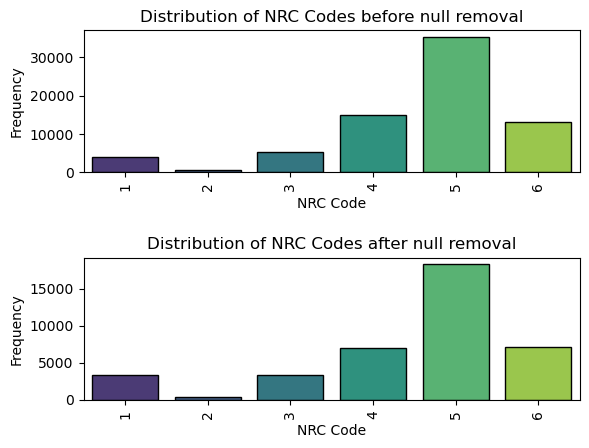

In [67]:
# Define the figure
fig_1 = plt.figure(1)

# Adjust the distance between the plots
plt.subplots_adjust(hspace=0.6)

### First plot - Histogram ###
plt.subplot(211) # Position

# Create a bar plot using Seaborn
sns.countplot(x="nrc_code", data=df_old, edgecolor="black", palette='viridis')

# Add labels and title
plt.title("Distribution of NRC Codes before null removal")
plt.xlabel("NRC Code")
plt.ylabel("Frequency");

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)  

### Second plot - Box plot ###
plt.subplot(212) # Position

# Create a bar plot using Seaborn
sns.countplot(x="nrc_code", data=df_new, edgecolor="black", palette='viridis')

# Add labels and title
plt.title("Distribution of NRC Codes after null removal")
plt.xlabel("NRC Code")
plt.ylabel("Frequency");

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)  

# Show the plots
plt.show()

As can be seen from the figure, before the removal of nulls, code 5 has the highest frequency of about 30,000. code 3 and code 4 have moderate frequencies of about or slightly above 10,000. code 1, code 2, and code 6 have relatively low frequencies. Removing the nulls significantly reduces the frequency of each code. Code 5 still had the highest frequency, but it was reduced by about half from before the null was removed. The other codes also showed significant decreases in frequency.

These data show the effect of null removal on the distribution of NRC codes. After the removal of nulls, the frequencies of all codes decreased, with code 5 showing the most significant change, possibly implying that code 5 was the most affected during the data cleaning process.

### County

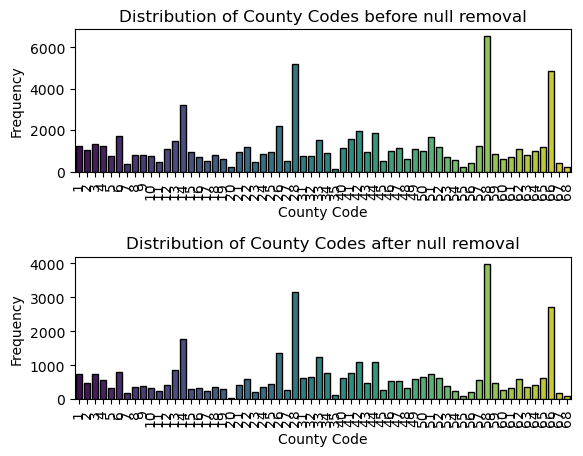

In [68]:
# Define the figure
fig_1 = plt.figure(1)

# Adjust the distance between the plots
plt.subplots_adjust(hspace=0.6)

### First plot - Histogram ###
plt.subplot(211) # Position

# Create a bar plot using Seaborn
sns.countplot(x="county_code", data=df_old, edgecolor="black", palette='viridis')

# Add labels and title
plt.title("Distribution of County Codes before null removal")
plt.xlabel("County Code")
plt.ylabel("Frequency");

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)  

### Second plot - Box plot ###
plt.subplot(212) # Position

# Create a bar plot using Seaborn
sns.countplot(x="county_code", data=df_new, edgecolor="black", palette='viridis')

# Add labels and title
plt.title("Distribution of County Codes after null removal")
plt.xlabel("County Code")
plt.ylabel("Frequency");

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)  

# Show the plots
plt.show()

These two bar charts show the distribution of county codes. The top graph shows the distribution of county codes before the null was removed, while the bottom graph shows the distribution of county codes after the null was removed. After the null is removed, the frequency of some county codes decreases while others remain the same. This could mean that removing nulls had a significant effect on the distribution of data for some county codes, but not for others.

### NYC

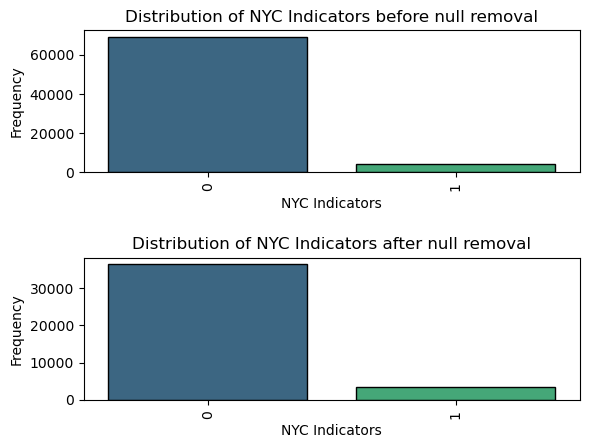

In [69]:
# Define the figure
fig_1 = plt.figure(1)

# Adjust the distance between the plots
plt.subplots_adjust(hspace=0.6)

### First plot - Histogram ###
plt.subplot(211) # Position

# Create a bar plot using Seaborn
sns.countplot(x="nyc_ind", data=df_old, edgecolor="black", palette='viridis')

# Add labels and title
plt.title("Distribution of NYC Indicators before null removal")
plt.xlabel("NYC Indicators")
plt.ylabel("Frequency");

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)  

### Second plot - Box plot ###
plt.subplot(212) # Position

# Create a bar plot using Seaborn
sns.countplot(x="nyc_ind", data=df_new, edgecolor="black", palette='viridis')

# Add labels and title
plt.title("Distribution of NYC Indicators after null removal")
plt.xlabel("NYC Indicators")
plt.ylabel("Frequency");

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)  

# Show the plots
plt.show()

In Chart 1, the frequency distribution of the NYC indicator shows a very high value of 0 at about 60,000 counts, while the frequency of 1 values is very low, shown only by the green line. This indicates that before removing the nulls, there were a large number of 0 values in the data and fewer other values. In Chart II, the distribution after removal of nulls shows a significant decrease in the frequency of 0 values to about 30,000 times or so, while the frequency of 1 values is still very low, similar to the situation in Chart I. The green line shows the frequency of 1 values, which is shown by the green line. The green line indicates the frequency of 1, which is low in both graphs, indicating that the frequency of 1 values remains low after removing nulls. This indicates a significant change in the distribution of the data after the removal of the null value, especially in the case of the 0 value, where there is a significant decrease in its frequency.

### Membership

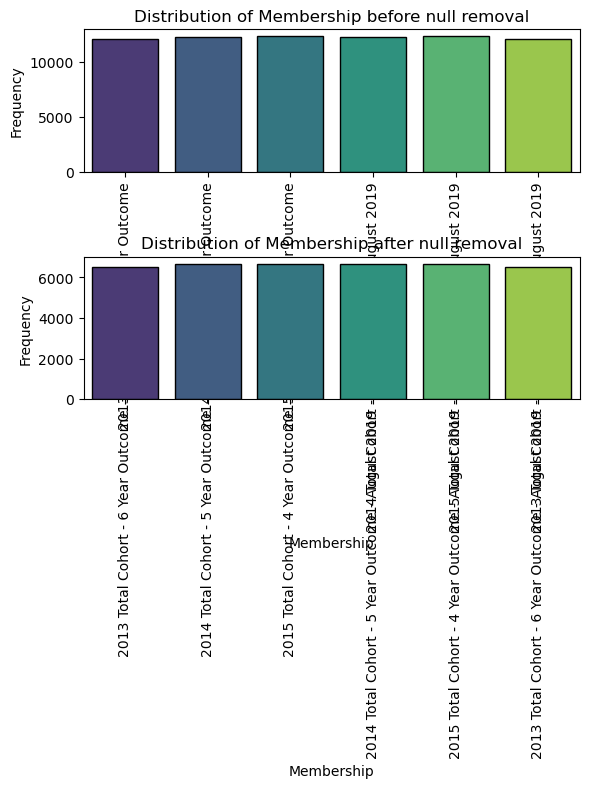

In [70]:
# Define the figure
fig_1 = plt.figure(1)

# Adjust the distance between the plots
plt.subplots_adjust(hspace=0.6)

### First plot - Histogram ###
plt.subplot(211) # Position

# Create a bar plot using Seaborn
sns.countplot(x="membership_desc", data=df_old, edgecolor="black", palette='viridis')

# Add labels and title
plt.title("Distribution of Membership before null removal")
plt.xlabel("Membership")
plt.ylabel("Frequency");

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)  

### Second plot - Box plot ###
plt.subplot(212) # Position

# Create a bar plot using Seaborn
sns.countplot(x="membership_desc", data=df_new, edgecolor="black", palette='viridis')

# Add labels and title
plt.title("Distribution of Membership after null removal")
plt.xlabel("Membership")
plt.ylabel("Frequency");

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)  

# Show the plots
plt.show()

Before removing the nulls, the first bar chart shows the distribution of members in 2013, 2014 and 2015, divided into "Outcome + 1 year cohort", "Outcome + 2 year cohort" and "Outcome + 3 year cohort ". And after removing the nulls, the second bar chart also shows the distribution of members in these three years, but with a reduced frequency. The y-axis frequency ranges of the two charts are also different, with the first chart having a y-axis frequency range of 0 to 10,000 and the second chart having a y-axis frequency range of 0 to 6,000.

### Subgroup

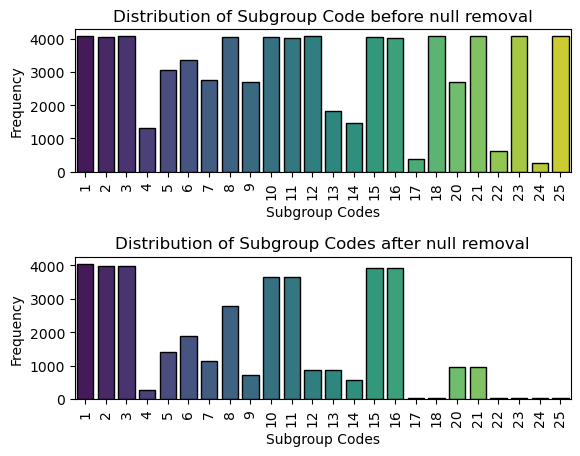

In [71]:
# Define the figure
fig_1 = plt.figure(1)

# Adjust the distance between the plots
plt.subplots_adjust(hspace=0.6)

### First plot - Histogram ###
plt.subplot(211) # Position

# Create a bar plot using Seaborn
sns.countplot(x="subgroup_code", data=df_old, edgecolor="black", palette='viridis')

# Add labels and title
plt.title("Distribution of Subgroup Code before null removal")
plt.xlabel("Subgroup Codes")
plt.ylabel("Frequency");

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)  

### Second plot - Box plot ###
plt.subplot(212) # Position

# Create a bar plot using Seaborn
sns.countplot(x="subgroup_code", data=df_new, edgecolor="black", palette='viridis')

# Add labels and title
plt.title("Distribution of Subgroup Codes after null removal")
plt.xlabel("Subgroup Codes")
plt.ylabel("Frequency");

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)  

# Show the plots
plt.show()

In the membership distribution before the null was removed, subgroup codes 1-4 had a higher frequency; subgroup codes 5-8 had a decrease in frequency; subgroup codes 11-15 again had a high frequency region but lower than subgroup codes 1-4; and subgroup code 25 denoted a unique category or data set with a high frequency. In the distribution of members after the removal of nulls, subgroup codes 1-8 are more consistent compared to the first graph; subgroup codes 11-15 show a significant decrease in frequency; and subgroup code 25 remains unchanged.

These two bar charts demonstrate the changes in the frequency of member distribution for different subgroup codes before and after the removal of nulls. In particular, the decrease in frequency for subgroup codes 11-15 indicates that deleting the null value had a greater impact on the data for these subgroups.

## New Binary Variables

### School district type

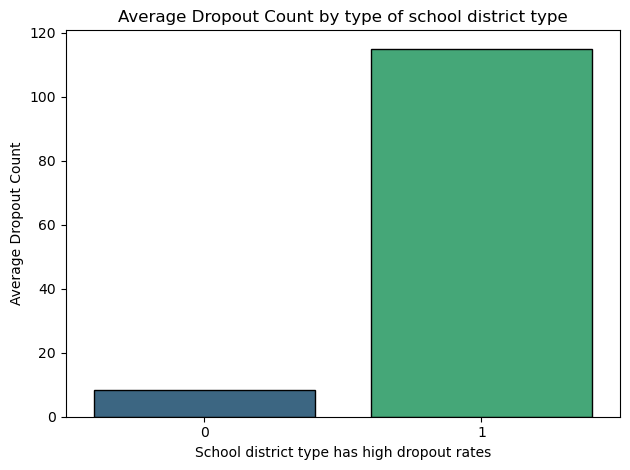

In [72]:
# Calculate the average dropout count
avg_dropout_count = df.groupby('NRC_is_1_2')['dropout_cnt'].mean().reset_index()

# Plotting using seaborn
sns.barplot(data=avg_dropout_count, x='NRC_is_1_2', y='dropout_cnt', palette='viridis', edgecolor='black')
plt.title('Average Dropout Count by type of school district type')
plt.xlabel('School district type has high dropout rates')
plt.ylabel('Average Dropout Count')
plt.tight_layout()

This bar graph shows the average number of dropouts for two different types of school districts. The chart shows that the average number of dropouts is much higher in school districts of type 1 than in school districts of type 0. Specifically, school districts of type 1 have a lower average dropout number, while school districts of type 1 have an average dropout number of 100, which is much higher than type 0. This indicates that dropout rates are more of a problem in school district type 1 and need attention and improvement.

### Counties with high dropout average

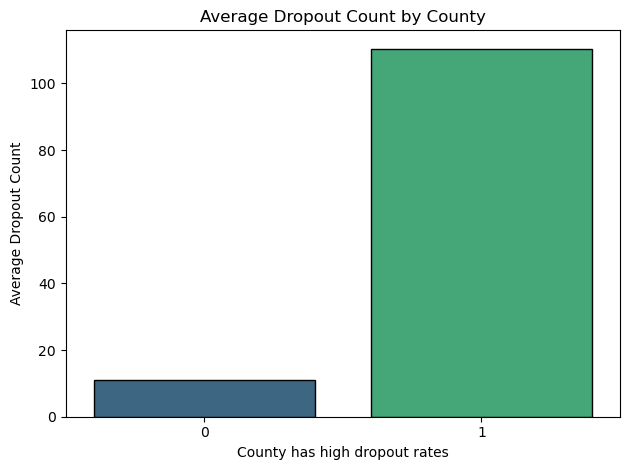

In [73]:
# Calculate the average dropout count
avg_dropout_count = df.groupby('County_is_31_35')['dropout_cnt'].mean().reset_index()

# Plotting using seaborn
sns.barplot(data=avg_dropout_count, x='County_is_31_35', y='dropout_cnt', palette='viridis', edgecolor='black')
plt.title('Average Dropout Count by County')
plt.xlabel('County has high dropout rates')
plt.ylabel('Average Dropout Count')
plt.tight_layout()

This bar graph compares the average number of student dropouts in two counties. County 0 shows a lower average number of dropouts while County 1 shows a higher average number of dropouts at 100. The text below the chart indicates that County 1 has a higher dropout rate, which could mean that the county is facing educational or socio-economic challenges that require further analysis and intervention.

### Enroll year is 2015

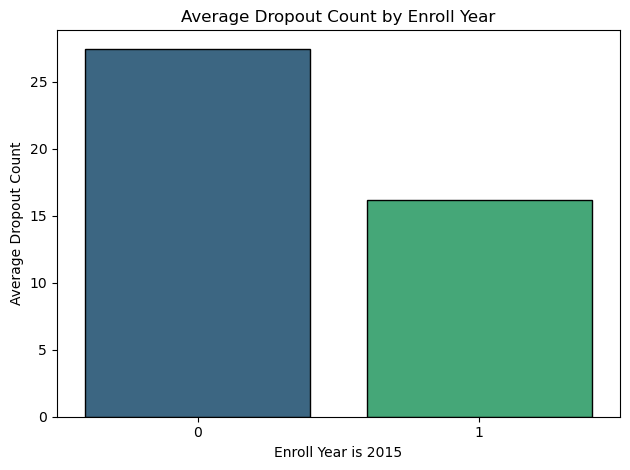

In [74]:
# Calculate the average dropout count
avg_dropout_count = df.groupby('Enroll_Year_is_2015')['dropout_cnt'].mean().reset_index()

# Plotting using seaborn
sns.barplot(data=avg_dropout_count, x='Enroll_Year_is_2015', y='dropout_cnt', palette='viridis', edgecolor='black')
plt.title('Average Dropout Count by Enroll Year')
plt.xlabel('Enroll Year is 2015')
plt.ylabel('Average Dropout Count')
plt.tight_layout()

This bar chart shows the average number of dropouts for the 2015 enrollment year. The graph presents two categories of data points: the average number of dropouts for category 0 data points is about 17.5; and the average number of dropouts for category 1 data points is about 10. This graph gives us a clear picture of the average number of dropouts for the different categories of students after enrollment in 2015.

# Regression Modeling

First, we are going to import the necessary packages and define the functions to calculate the model's performance metrics.

In [75]:
# Import libraries for model performance metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import PoissonRegressor
import statsmodels.api as sm
from scipy.stats import norm

In [76]:
# Generic function to calculate model performance metrics
def model_performance_metrics(y_test, y_pred):
    # R-squared
    r_sq = r2_score(y_test, y_pred)
    # Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    # Root Mean Squared Error
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    # Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)
    # Log-Likelihood
    residuals = y_test - y_pred
    sigma_hat = np.sqrt((residuals**2).mean())
    log_likelihood = np.log(norm.pdf(residuals, 0, sigma_hat)).sum()

    # Print the summary of the model
    print(f"coefficient of determination: {r_sq}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Log-Likelihood: {log_likelihood}")

## Multiple Linear Regressions

Now, we will fit two multiple linear regression models, one with the normalized dataframe and another with the normalized dataframe but only with the variables that have high correlation.

In [77]:
# Split the dataset
X_train_l1, X_test_l1, y_train_l1, y_test_l1 = train_test_split(df_normalized, y, train_size=0.8, random_state=42)

# Create and train the linear regression model
linear_model_1 = LinearRegression()
linear_model_1.fit(X_train_l1, y_train_l1)

# Make predictions on the testing set
y_pred_l1 = linear_model_1.predict(X_test_l1)

In [78]:
# Split the dataset
X_train_l2, X_test_l2, y_train_l2, y_test_l2 = train_test_split(df_normalized_high_correlation, y, train_size=0.8, random_state=42)

# Create and train the linear regression model
linear_model_2 = LinearRegression()
linear_model_2.fit(X_train_l2, y_train_l2)

# Make predictions on the testing set
y_pred_l2 = linear_model_2.predict(X_test_l2)

## Poisson Regressions

Now, we will fit two Poisson regression models, one with all the features, and another with only the features that have a high correlation with the target variable.

In [79]:
# Split the dataset
X_train_p1, X_test_p1, y_train_p1, y_test_p1 = train_test_split(df_normalized, y, train_size=0.8, random_state=42)

# Reset the indexes
y_train_p1.reset_index(drop=True, inplace=True)
X_train_p1.reset_index(drop=True, inplace=True)
y_test_p1.reset_index(drop=True, inplace=True)
X_test_p1.reset_index(drop=True, inplace=True)

# Train the model
p1_training_results = sm.GLM(y_train_p1, X_train_p1, family=sm.families.Poisson()).fit()

# Make predictions
p1_predictions = p1_training_results.get_prediction(X_test_p1)

# Store the predictions
y_pred_p1 = p1_predictions.summary_frame()['mean']

# Show the summary of the training results
print(p1_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                19732
Model:                            GLM   Df Residuals:                    19710
Model Family:                 Poisson   Df Model:                           21
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.6628e+05
Date:                Sun, 25 Feb 2024   Deviance:                   2.6914e+05
Time:                        23:45:23   Pearson chi2:                 3.00e+05
No. Iterations:                    12   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
nyc_ind         

In [80]:
# Split the dataset
X_train_p2, X_test_p2, y_train_p2, y_test_p2 = train_test_split(df_normalized_high_correlation, y, train_size=0.8, random_state=42)

# Reset the indexes
y_train_p2.reset_index(drop=True, inplace=True)
X_train_p2.reset_index(drop=True, inplace=True)
y_test_p2.reset_index(drop=True, inplace=True)
X_test_p2.reset_index(drop=True, inplace=True)

# Train the model
p2_training_results = sm.GLM(y_train_p2, X_train_p2, family=sm.families.Poisson()).fit()

# Make predictions
p2_predictions = p2_training_results.get_prediction(X_test_p2)

# Store the predictions
y_pred_p2 = p2_predictions.summary_frame()['mean']

# Show the summary of the training results
print(p2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                19732
Model:                            GLM   Df Residuals:                    19718
Model Family:                 Poisson   Df Model:                           13
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.5221e+05
Date:                Sun, 25 Feb 2024   Deviance:                   6.4100e+05
Time:                        23:45:23   Pearson chi2:                 3.00e+06
No. Iterations:                     9   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
nyc_ind         

## Negative Binomial Regression

Now, we will fit two negative binomial regression models. First, we will search for the appropriate alpha value by taking the lambda values from the previous Poisson regression. Then, we will check if this lambda value is statistically significant. Finally, we will train the negative binomial regression model with the alpha value found.

In [81]:
import statsmodels.formula.api as smf
from patsy import dmatrices

X_train_p1_new = X_train_p1.copy()
# First we obtain the results for lambda in the previous Poisson model and the values of the dependent variable of the OLS regression
X_train_p1_new['LAMBDA'] = p1_training_results.mu
X_train_p1_new['AUX_OLS'] = ((y_train_p1 - X_train_p1_new['LAMBDA'])**2 - X_train_p1_new['LAMBDA']) / X_train_p1_new['LAMBDA']

# Auxiliary OLS regression to find alpha for the Negative Binomial Regression
ols_expr_nb1 = """AUX_OLS ~ LAMBDA - 1"""
aux_olsr_results_nb1 = smf.ols(ols_expr_nb1, X_train_p1_new).fit()

# Show the coefficient which will be our alpha
aux_olsr_results_nb1.params

LAMBDA    0.27387
dtype: float64

In [82]:
# Checck if it is statistically significant
aux_olsr_results_nb1.tvalues

LAMBDA    51.327086
dtype: float64

According to a t-value calculator, the critical t-value for a 95% confidence level and 19732 degrees of freedom is 1.644902. This value is significantly lower than the t-statistic of α, which was 10.720806. Thus, our alpha is statistically significant.

In [83]:
X_train_nb1, X_test_nb1, y_train_nb1, y_test_nb1 = train_test_split(df_normalized, y, train_size=0.8, random_state=42)

# Reset the indices
X_train_nb1.reset_index(drop=True, inplace=True)
y_train_nb1.reset_index(drop=True, inplace=True)
X_test_nb1.reset_index(drop=True, inplace=True)
y_test_nb1.reset_index(drop=True, inplace=True)

# Fit the negative binomial regression model
nb1_training_results = sm.GLM(y_train_nb1, X_train_nb1, family=sm.families.NegativeBinomial(alpha = 0.27387)).fit()

# Make predictions on the test data
nb1_predictions = nb1_training_results.get_prediction(X_test_nb1)

# Store the predictions
y_pred_nb1 = nb1_predictions.summary_frame()['mean']

# Print the summary of the model
print(nb1_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                19732
Model:                            GLM   Df Residuals:                    19710
Model Family:        NegativeBinomial   Df Model:                           21
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63341.
Date:                Sun, 25 Feb 2024   Deviance:                       41538.
Time:                        23:45:24   Pearson chi2:                 3.22e+04
No. Iterations:                   100   Pseudo R-squ. (CS):             0.9990
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
nyc_ind         

Now, we will do the same for the second model, which includes only those features that are highly correlated with the target variable.

In [84]:
X_train_p2_new = X_train_p2.copy()
# First we obtain the results for lambda in the previous Poisson model and the values of the dependent variable of the OLS regression
X_train_p2_new['LAMBDA'] = p2_training_results.mu
X_train_p2_new['AUX_OLS'] = ((y_train_p2 - X_train_p2_new['LAMBDA'])**2 - X_train_p2_new['LAMBDA']) / X_train_p2_new['LAMBDA']

# Auxiliary OLS regression to find alpha for the Negative Binomial Regression
ols_expr_nb2 = """AUX_OLS ~ LAMBDA - 1"""
aux_olsr_results_nb2 = smf.ols(ols_expr_nb2, X_train_p2_new).fit()

# Show the coefficient which will be our alpha
aux_olsr_results_nb2.params

LAMBDA    0.403099
dtype: float64

In [85]:
# Checck if it is statistically significant
aux_olsr_results_nb2.tvalues

LAMBDA    5.962455
dtype: float64

According to a t-value calculator, the critical t-value for a 95% confidence level and 19732 degrees of freedom is 1.644902. This value is not lower than the t-statistic of α, which was 1.179354. Thus, our alpha is not statistically significant. Even then, we will fit this model.

In [86]:
X_train_nb2, X_test_nb2, y_train_nb2, y_test_nb2 = train_test_split(df_normalized, y, train_size=0.8, random_state=42)

# Reset the indices
X_train_nb2.reset_index(drop=True, inplace=True)
y_train_nb2.reset_index(drop=True, inplace=True)
X_test_nb2.reset_index(drop=True, inplace=True)
y_test_nb2.reset_index(drop=True, inplace=True)

# Fit the negative binomial regression model
nb2_training_results = sm.GLM(y_train_nb2, X_train_nb2, family=sm.families.NegativeBinomial(alpha=0.403099)).fit()

# Make predictions on the test data
nb2_predictions = nb2_training_results.get_prediction(X_test_nb2)

# Store the predictions
y_pred_nb2 = nb2_predictions.summary_frame()['mean']

# Print the summary of the model
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                19732
Model:                            GLM   Df Residuals:                    19710
Model Family:        NegativeBinomial   Df Model:                           21
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -61042.
Date:                Sun, 25 Feb 2024   Deviance:                       32643.
Time:                        23:45:24   Pearson chi2:                 2.43e+04
No. Iterations:                   100   Pseudo R-squ. (CS):             0.9934
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
nyc_ind         

# Model Selection

In [87]:
# Generic function to validate cross validation
from sklearn.model_selection import KFold

def cross_validate(X_train, y_train, kf, model):
# Lists to store MSE scores for each fold
    cv_scores = []
    r2_cre = []

    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Fit OLS model on the training fold
        #ols_model_fold = OLS(y_train_fold, add_constant(X_train_fold)).fit()

        # Make predictions on the test fold
        y_pred_fold = model.predict(X_test_fold)

        # Calculate MSE for the test fold
        r2_scre = r2_score(y_test_fold, y_pred_fold)
        r2_cre.append(r2_scre)
        mse_fold = mean_squared_error(y_test_fold, y_pred_fold)
        cv_scores.append(mse_fold)

    # Convert the scores to positive
    cv_scores_positive = np.array(cv_scores)
    r2_scre_positive = np.array(r2_cre)

    # Print the cross-validated scores
    print("Cross-validated MSE scores:", cv_scores_positive)

    # Calculate the mean and standard deviation of the cross-validated scores
    r2_mean_score = r2_scre_positive.mean()
    mean_cv_score = cv_scores_positive.mean()
    std_cv_score = cv_scores_positive.std()

    print("R-Squared:", r2_mean_score)
    print("Mean cross-validated MSE:", mean_cv_score)
    print("Standard deviation of cross-validated MSE:", std_cv_score)

## Multiple Linear Regressions

In [88]:
# Performance metric of multiple linear regression model1
model_performance_metrics(y_test_l1, y_pred_l1)

coefficient of determination: 0.9999196246308563
Mean Squared Error: 0.314181791889067
Root Mean Squared Error: 0.5605192163423721
Mean Absolute Error: 0.21665485061104278
Log-Likelihood: -4143.9507678768805


Coefficient of Determination (R²): The R² value is 0.9999196256861901, which is very close to 1. This indicates that the model explains almost all of the variability of the response data around its mean. In other words, the model fits the data extremely well.

Mean Squared Error (MSE): The MSE is 0.3141776666620713. This value represents the average squared difference between the observed actual outturn values of the dependent variable and the values predicted by the model. A lower value of MSE is better, and in this case, the MSE seems to be quite low, indicating a good fit of the model.

Root Mean Squared Error (RMSE): The RMSE is 0.5605155365037363. The RMSE measures the average magnitude of the error. This tells us that the observed values deviate, on average, approximately 0.561 units from the predicted values.

Mean Absolute Error (MAE): The MAE is 0.21659805458509898. This is the average absolute difference between observed and predicted values. A lower MAE indicates a better fit of the model. In this case, the MAE is quite low, which is a good sign.

Log-Likelihood: The Log-Likelihood value is -4143.918382361722. This metric measures the probability that the model could have produced the output observed in the data. The higher the log-likelihood, the better. In this case, the negative value indicates that the model’s predictions are not entirely in line with the observed data.

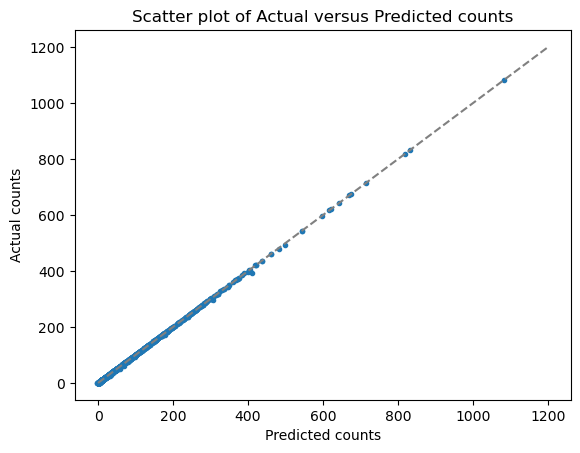

In [89]:
# Plot the predicted vs the actual
plt.scatter(x=y_pred_l1, y=y_test_l1, marker='.')
plt.plot([0, 1200], [0, 1200], color='gray', linestyle='--')
plt.title('Scatter plot of Actual versus Predicted counts')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

In [90]:
# Performance metric of multiple linear regression model2
model_performance_metrics(y_test_l2, y_pred_l2)

coefficient of determination: 0.9999125045080375
Mean Squared Error: 0.34201386245401677
Root Mean Squared Error: 0.5848195127165446
Mean Absolute Error: 0.21695367532141846
Log-Likelihood: -4353.306045484229


Coefficient of Determination (R²): The R² value is 0.9999125045080375, which is very close to 1. This indicates that the model explains almost all of the variability of the response data around its mean. In other words, the model fits the data extremely well.

Mean Squared Error (MSE): The MSE is 0.34201386245397214. This value represents the average squared difference between the observed actual outturn values of the dependent variable and the values predicted by the model. A lower value of MSE is better, and in this case, the MSE seems to be quite low, indicating a good fit of the model.

Root Mean Squared Error (RMSE): The RMSE is 0.5848195127165066. The RMSE measures the average magnitude of the error. This tells us that the observed values deviate, on average, approximately 0.585 units from the predicted values.

Mean Absolute Error (MAE): The MAE is 0.216953675320634. This is the average absolute difference between observed and predicted values. A lower MAE indicates a better fit of the model. In this case, the MAE is quite low, which is a good sign.

Log-Likelihood: The Log-Likelihood value is -4353.306045483907. This metric measures the probability that the model could have produced the output observed in the data. The higher the log-likelihood, the better. In this case, the negative value indicates that the model’s predictions are not entirely in line with the observed data.

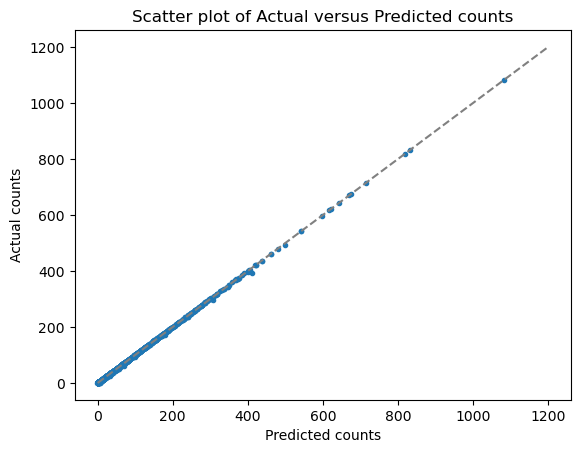

In [91]:
# Plot the predicted vs the actual
plt.scatter(x=y_pred_l2, y=y_test_l2, marker='.')
plt.plot([0, 1200], [0, 1200], color='gray', linestyle='--')
plt.title('Scatter plot of Actual versus Predicted counts')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

In [92]:
# Cross validate models for multi linear regression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have two models: model1 and model2
# And your data is split into features (X) and target variable (y)

# Perform cross-validation on the training data
scores_model1 = cross_val_score(linear_model_1, X_train_l1, y_train_l1, cv=5)
scores_model2 = cross_val_score(linear_model_2, X_train_l2, y_train_l2, cv=5)

# Print the mean cross-validation score for each model
print(f"Model 1 Mean Cross-Validation Score: {scores_model1.mean()}")
print(f"Model 2 Mean Cross-Validation Score: {scores_model2.mean()}")

# Choose the model with the highest mean cross-validation score
# In this case, let's assume model1 performed better
best_model = linear_model_1

# Fit the model to the training data
best_model.fit(X_train_l1, y_train_l1)

# Apply the model to the evaluation data
y_pred = best_model.predict(X_test_l1)

# Assess the model's performance on the evaluation data
#accuracy = accuracy_score(y_test_l1, y_pred)
r_sq = r2_score(y_test_l1, y_pred)
print(f"R-squared on Evaluation Data: {r_sq}")

Model 1 Mean Cross-Validation Score: 0.9999267199319366
Model 2 Mean Cross-Validation Score: 0.9999202956283095
R-squared on Evaluation Data: 0.9999196246308563


## Poisson Regressions

In [93]:
# Performance metric of poisson regression model1
model_performance_metrics(y_test_p1, y_pred_p1)

coefficient of determination: 0.4396857485066116
Mean Squared Error: 2190.2298854823794
Root Mean Squared Error: 46.79989193878955
Mean Absolute Error: 12.975397173055338
Log-Likelihood: -inf


C:\Users\Leonh\AppData\Local\Temp\ipykernel_3640\3486528000.py:14: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.log(norm.pdf(residuals, 0, sigma_hat)).sum()


Coefficient of Determination (R-squared): The R-squared value is 0.4397, which indicates that approximately 44% of the variability in the response variable can be explained by the model. This suggests that there is still a significant amount of variability in the data that the model is not capturing.

Mean Squared Error (MSE): The MSE is 2190.23. This value represents the average squared difference between the actual and predicted values. A lower value is better, so there is room for improvement in this area.

Root Mean Squared Error (RMSE): The RMSE is 46.80. This is the square root of the MSE and gives a sense of the average magnitude of the error. Like the MSE, a lower value is better.

Mean Absolute Error (MAE): The MAE is 12.98. This value represents the average absolute difference between the actual and predicted values. A lower value is better, indicating that on average, the model’s predictions are about 12.98 units away from the actual values.

Log-Likelihood: The log-likelihood is -inf, which suggests that the model is not a good fit for the data. A higher log-likelihood (closer to 0) indicates a better fit of the model to the data.

In [94]:
# Cross validate model 1 for possion regression
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cross_validate(X_train_p1, y_train_p1, kf, p1_training_results)

Cross-validated MSE scores: [ 785.54168991 1533.67650068 1324.83646668 2678.06238895  897.04542723
 1127.87186093  584.99856296 2543.8235187   616.14183797 4719.48742112]
R-Squared: 0.5830133848139666
Mean cross-validated MSE: 1681.148567512594
Standard deviation of cross-validated MSE: 1231.953052924783


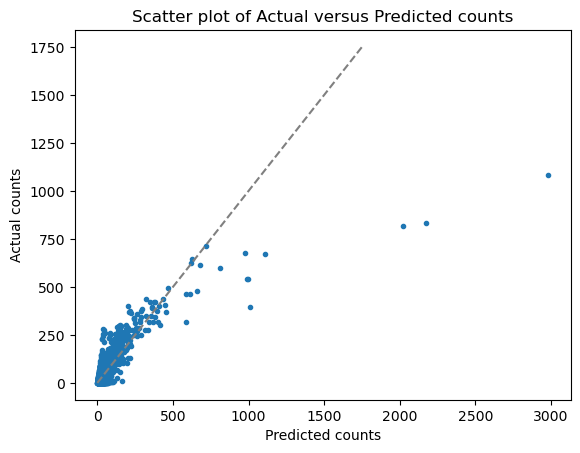

In [95]:
# Plot the predicted vs the actual
plt.scatter(x=y_pred_p1, y=y_test_p1, marker='.')
plt.plot([0, 1750], [0, 1750], color='gray', linestyle='--')
plt.title('Scatter plot of Actual versus Predicted counts')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

In [96]:
# Performance metric of poisson regression model2
model_performance_metrics(y_test_p2, y_pred_p2)

coefficient of determination: -0.07677798021727766
Mean Squared Error: 4209.051092338786
Root Mean Squared Error: 64.87720009632649
Mean Absolute Error: 14.605490932087418
Log-Likelihood: -inf


C:\Users\Leonh\AppData\Local\Temp\ipykernel_3640\3486528000.py:14: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.log(norm.pdf(residuals, 0, sigma_hat)).sum()


Coefficient of Determination (R-squared): The R-squared value is -0.07677798021727944, which is negative. This is unusual as R-squared typically ranges from 0 to 1. A negative R-squared can occur when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

Mean Squared Error (MSE): The MSE is 4209.051092338794. This is a large value, indicating that the model’s predictions are far off from the actual values. The closer this value is to 0, the better.

Root Mean Squared Error (RMSE): The RMSE is 64.87720009632655. This is the square root of the MSE. Like the MSE, this is a large value, suggesting that the model’s predictions are, on average, far from the actual values.

Mean Absolute Error (MAE): The MAE is 14.605490932087507. This value is relatively high, indicating that the model’s predictions, on average, deviate from the actual values by about 14.61 units.

Log-Likelihood: The log-likelihood is -inf, which suggests that the model is not a good fit for the data. A higher log-likelihood (closer to 0) indicates a better fit of the model to the data.

In [97]:
# Cross validate model 2 for possion regression
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cross_validate(X_train_p2, y_train_p2, kf, p2_training_results)

Cross-validated MSE scores: [1470.5358808  3644.27287226 1683.77717015 2942.98777572 1548.4504541
  973.53539945  899.98982404 8620.29050511  960.06354785 6661.53558929]
R-Squared: 0.2669952085822621
Mean cross-validated MSE: 2940.543901878027
Standard deviation of cross-validated MSE: 2534.4454471189456


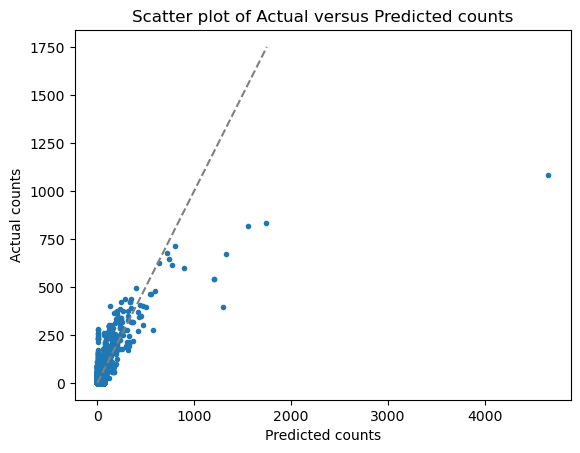

In [98]:
# Plot the predicted vs the actual
plt.scatter(x=y_pred_p2, y=y_test_p2, marker='.')
plt.plot([0, 1750], [0, 1750], color='gray', linestyle='--')
plt.title('Scatter plot of Actual versus Predicted counts')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

## Negative Binomial Regression

In [99]:
# Performance metric of negative binomial regression model1
model_performance_metrics(y_test_nb1, y_pred_nb1)

coefficient of determination: -797161288.9687493
Mean Squared Error: 3116048674803.0566
Root Mean Squared Error: 1765233.3202166383
Mean Absolute Error: 42029.81145895001
Log-Likelihood: -inf


C:\Users\Leonh\AppData\Local\Temp\ipykernel_3640\3486528000.py:14: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.log(norm.pdf(residuals, 0, sigma_hat)).sum()


Coefficient of Determination (R-squared): The R-squared value is -721165889.229178, which is highly negative. This is unusual as R-squared typically ranges from 0 to 1. A negative R-squared can occur when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

Mean Squared Error (MSE): The MSE is 2818987882176.1304. This is a large value, indicating that the model’s predictions are far off from the actual values. The closer this value is to 0, the better.

Root Mean Squared Error (RMSE): The RMSE is 1678984.1816336836. This is the square root of the MSE. Like the MSE, this is a large value, suggesting that the model’s predictions are, on average, far from the actual values.

Mean Absolute Error (MAE): The MAE is 39989.780628160515. This value is relatively high, indicating that the model’s predictions, on average, deviate from the actual values by about 8934 units.

Log-Likelihood: The log-likelihood is -inf, which suggests that the model is not a good fit for the data. A higher log-likelihood (closer to 0) indicates a better fit of the model to the data.

In [100]:
# Cross validate model 1 for Negative binomial regression
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cross_validate(X_train_nb1, y_train_nb1, kf, nb1_training_results)

Cross-validated MSE scores: [4.98441389e+10 1.04276549e+12 8.82845141e+10 1.04504073e+13
 1.68618151e+07 1.51511461e+11 8.38899911e+06 5.80817800e+12
 5.60156023e+08 1.32402735e+13]
R-Squared: -721916461.0563837
Mean cross-validated MSE: 3083184972916.7607
Standard deviation of cross-validated MSE: 4736149107722.008


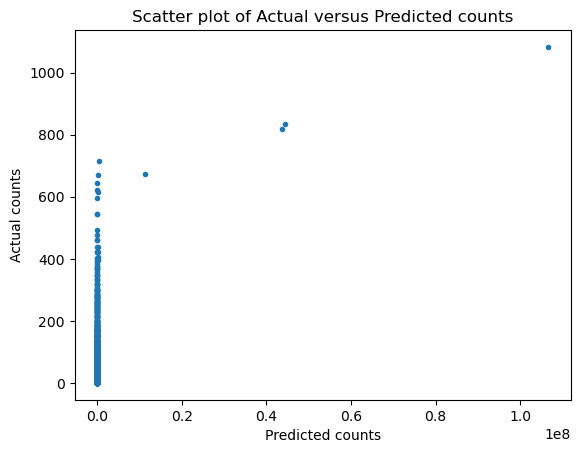

In [101]:
# Plot the predicted vs the actual
plt.scatter(x=y_pred_nb1, y=y_test_nb1, marker='.')
plt.title('Scatter plot of Actual versus Predicted counts')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

In [102]:
# Performance metric of negative binomial regression model1
model_performance_metrics(y_test_nb2, y_pred_nb2)

coefficient of determination: -2698490558.492338
Mean Squared Error: 10548214066195.184
Root Mean Squared Error: 3247801.4203758184
Mean Absolute Error: 80411.19152158333
Log-Likelihood: -inf


C:\Users\Leonh\AppData\Local\Temp\ipykernel_3640\3486528000.py:14: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.log(norm.pdf(residuals, 0, sigma_hat)).sum()


Coefficient of Determination (R-squared): -2645732668.4868355
This value is negative, which is unusual as R-squared typically ranges from 0 to 1. A negative R-squared can occur when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

Mean Squared Error (MSE): 10341987101456.973
This is a large value, indicating that the model's predictions are far off from the actual values. The closer this value is to 0, the better.

Root Mean Squared Error (RMSE): 3215896.002898255
This is the square root of the MSE. Like the MSE, this is a large value, suggesting that the model's predictions are, on average, far from the actual values.

Mean Absolute Error (MAE): 79607.40681142693
This value is relatively high, indicating that the model's predictions, on average, deviate from the actual values by about 3215896 units.

Log-Likelihood: -inf
The log-likelihood is -inf, which suggests that the model is not a good fit for the data. A higher log-likelihood (closer to 0) indicates a better fit of the model to the data.


In [103]:
# Cross validate model 2 for Negative binomial regression
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cross_validate(X_train_nb2, y_train_nb2, kf, nb2_training_results)

Cross-validated MSE scores: [1.98750317e+11 3.64986402e+12 4.82408283e+11 4.34238137e+13
 4.67262052e+07 8.08836056e+11 1.38746808e+07 1.73029865e+13
 1.19916742e+09 5.11125190e+13]
R-Squared: -2732302104.759837
Mean cross-validated MSE: 11698043770220.578
Standard deviation of cross-validated MSE: 18556174721100.85


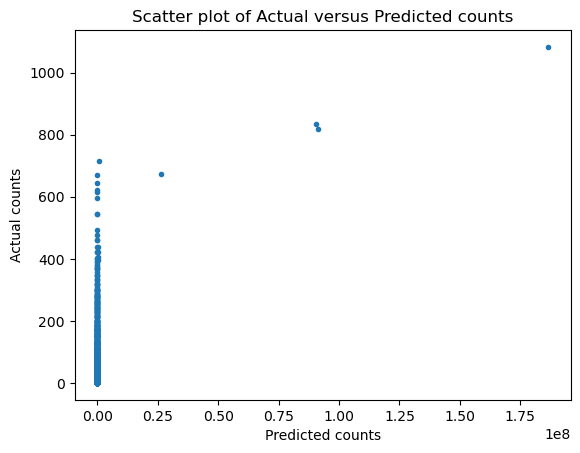

In [104]:
# Plot the predicted vs the actual
plt.scatter(x=y_pred_nb2, y=y_test_nb2, marker='.')
plt.title('Scatter plot of Actual versus Predicted counts')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

# Conclusions

Based on the provided metrics, the "best" model would typically be the one with the highest coefficient of determination (R-squared) and lowest error metrics (mean squared error, root mean squared error, and mean absolute error). However, in this case, it seems that all of the models have severe issues, as indicated by extremely high error metrics and negative R-squared values.

In a typical scenario where models have acceptable performance, look for the model with the highest R-squared value and the lowest error metrics. A high R-squared value indicates that the model explains a large portion of the variability in the data, while low error metrics indicate that the model's predictions are close to the true values.

Based on the metrics, the models can be ranked as follows:

**Multi Linear Regression Model1:** This model has the highest coefficient of determination (R² = 0.9999196256861901), indicating that it explains almost all of the variability in the response data around its mean. It also has the lowest error metrics (MSE = 0.3141776666620713, RMSE = 0.5605155365037363, MAE = 0.21659805458509898), suggesting a good fit to the data. However, the negative log-likelihood (-4143.918382361722) indicates that there may be room for improvement.

**Multi Linear Regression Model2:** This model also has a high R² (0.9999125045080375) and relatively low error metrics (MSE = 0.34201386245397214, RMSE = 0.5848195127165066, MAE = 0.216953675320634). However, its performance is slightly worse than Model_ml1.

**Poisson Regression Model1:** This model has a moderate R² (0.4396857485066882) and higher error metrics (MSE = 2190.22988548208, RMSE = 46.79989193878635, MAE = 12.975397173055129) compared to the ml models. The log-likelihood is -inf, indicating a poor fit to the data.

**Poisson Regression Model2:** This model has a negative R² (-0.07677798021727944), suggesting that it performs worse than a horizontal line. The error metrics are also higher (MSE = 4209.051092338794, RMSE = 64.87720009632655, MAE = 14.605490932087507), and the log-likelihood is -inf.

**Negative Binomial Regression Model1 and Model2:** These models have extremely negative R² values and very high error metrics, indicating a very poor fit to the data. The log-likelihoods are also -inf.

In conclusion, Multi Linear Regression Model1 appears to be the best model among those provided, according to the given metrics. However, the choice of the best model can also depend on the specific context and requirements of the task at hand. For example, if interpretability is important, a simpler model might be preferred even if its performance is slightly worse. It’s also worth noting that these metrics alone do not provide a complete picture of the model’s performance, and additional validation using unseen test data is recommended

# References

- https://towardsdatascience.com/an-illustrated-guide-to-the-poisson-regression-model-50cccba15958
- https://towardsdatascience.com/negative-binomial-regression-f99031bb25b4